# Content
### Basics: describe, info, Value_Counts, isna().sum()

### Univariate Analysis:
 #### Continuous Features:
* Boxplots
* Histograms
* Outliers & Skewed Distributions
* Mean Median Mode Quantiles
* Handling Missing Values

#### Categorical Features:
* Countplot
* Mode
* Handling Missing Values
* Encoding: Label Encoding, OneHotEncoding

### Bivariate Analysis:
* Continuous-Continuous: Scatterplot, Correlation
* Continuous-Categorical: Boxplots & Histograms
* Categorical-Categorical: CrossTabs

### Multivariate Analysis:
* Hue
* Brief Mention on Dimensionality Reduction

### Feature Scaling:
* Min-Max Scaling
* Standardization: StandardScaler, RobustScaler
* Brief Mention on Nonlinear scalers

# Basics:

In [1]:
import numpy as np #This is we just import without really needing it that much
import pandas as pd #For data processing, manipulation and even a bit of visualization
import matplotlib.pyplot as plt #For visualization
import seaborn as sns #For prettier visualization

In [2]:
data = pd.read_csv("../input/cleaned-ckd-dataset/CleanedKidneyDisease.csv")
#That red sentence is the pa>th of the dataset file

In [3]:
data.head() #To see the first five rows of the dataset

,Unnamed: 0,Age (yrs),Blood Pressure (mm/Hg),Specific Gravity,Albumin,Sugar,Red Blood Cells,Pus Cells,Pus Cell Clumps,Bacteria,...,White Blood Cells (cells/cmm),Red Blood Cells (millions/cmm),Hypertension,Diabetes Mellitus,Coronary Artery Disease,Appetite,Pedal Edema,Anemia,Chronic Kidney Disease,Blood_Type
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,7800.0,5.2,yes,yes,no,good,no,no,ckd,O
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,6000.0,NaN,no,no,no,good,no,no,ckd,A
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,7500.0,NaN,no,yes,no,poor,no,yes,ckd,B
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,6700.0,3.9,yes,no,no,poor,yes,yes,ckd,O
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,7300.0,4.6,no,no,no,good,no,no,ckd,A


We can see that there is an extra columns called "Unnamed: 0" that simply contains indices.  
We don't need it so we'll remove it.

In [4]:
data.drop("Unnamed: 0", axis=1, inplace=True)
#axis=1 means it's a column not a row/line
#inplace=True means "change the original dataframe"
#inplace=False means "create a new dataframe without that column"

The info() function gives you some general information about your data.  
**Numerical** features/columns are the ones whose data type (Dtype) is **"float"** or **"int"** .  
**Categorical** features are the ones whose data type is **"object"**.  

Sometimes your data contains mistyped features, such as when the "salary of an employee" is considered an object instead of a float/int. In such a situation, you have to fix it.

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Age (yrs)                       391 non-null    float64
 1   Blood Pressure (mm/Hg)          388 non-null    float64
 2   Specific Gravity                353 non-null    float64
 3   Albumin                         354 non-null    float64
 4   Sugar                           351 non-null    float64
 5   Red Blood Cells                 248 non-null    object 
 6   Pus Cells                       335 non-null    object 
 7   Pus Cell Clumps                 396 non-null    object 
 8   Bacteria                        396 non-null    object 
 9   Blood Glucose Random (mgs/dL)   356 non-null    float64
 10  Blood Urea (mgs/dL)             381 non-null    float64
 11  Serum Creatinine (mgs/dL)       383 non-null    float64
 12  Sodium (mEq/L)                  313 

You can also see names of the columns using the following syntax:

In [6]:
data.columns

Index(['Age (yrs)', 'Blood Pressure (mm/Hg)', 'Specific Gravity', 'Albumin',
       'Sugar', 'Red Blood Cells', 'Pus Cells', 'Pus Cell Clumps', 'Bacteria',
       'Blood Glucose Random (mgs/dL)', 'Blood Urea (mgs/dL)',
       'Serum Creatinine (mgs/dL)', 'Sodium (mEq/L)', 'Potassium (mEq/L)',
       'Hemoglobin (gms)', 'Packed Cell Volume',
       'White Blood Cells (cells/cmm)', 'Red Blood Cells (millions/cmm)',
       'Hypertension', 'Diabetes Mellitus', 'Coronary Artery Disease',
       'Appetite', 'Pedal Edema', 'Anemia', 'Chronic Kidney Disease',
       'Blood_Type'],
      dtype='object')

The following cell allows us to see what values each column/feature contains.  
It also shows us how many times each value is repeated.  
For example, you can see that there are 19 people whose age is 60, and 17 people whose age is 65.

In [7]:
for col in data.columns:
    print(f"\n\nUnique Values in {col}:")
    print(data[col].value_counts())



Unique Values in Age (yrs):
60.0    19
65.0    17
48.0    12
55.0    12
50.0    12
        ..
83.0     1
27.0     1
14.0     1
81.0     1
79.0     1
Name: Age (yrs), Length: 76, dtype: int64


Unique Values in Blood Pressure (mm/Hg):
80.0     116
70.0     112
60.0      71
90.0      53
100.0     25
50.0       5
110.0      3
140.0      1
180.0      1
120.0      1
Name: Blood Pressure (mm/Hg), dtype: int64


Unique Values in Specific Gravity:
1.020    106
1.010     84
1.025     81
1.015     75
1.005      7
Name: Specific Gravity, dtype: int64


Unique Values in Albumin:
0.0    199
1.0     44
2.0     43
3.0     43
4.0     24
5.0      1
Name: Albumin, dtype: int64


Unique Values in Sugar:
0.0    290
2.0     18
3.0     14
4.0     13
1.0     13
5.0      3
Name: Sugar, dtype: int64


Unique Values in Red Blood Cells:
normal      201
abnormal     47
Name: Red Blood Cells, dtype: int64


Unique Values in Pus Cells:
normal      259
abnormal     76
Name: Pus Cells, dtype: int64


Unique Values 

We can see in the previous cell that in the "Diabetes Mellitus" column, someone has a value of " yes" (with a space) instead of "yes" 'without a space).  
The following cell corrects that.

In [8]:
for i in range(data.shape[0]):
    if data.loc[i, "Diabetes Mellitus"]==' yes':
        data.loc[i, "Diabetes Mellitus"]='yes'
        break

The "data.shape" instruction simply tells you haw many lines and how many columns your dataframe contains.

In [9]:
data.shape

(400, 26)

The following code tells us how many missing values there are per column/feature

In [10]:
data.isna().sum()

Age (yrs)                           9
Blood Pressure (mm/Hg)             12
Specific Gravity                   47
Albumin                            46
Sugar                              49
Red Blood Cells                   152
Pus Cells                          65
Pus Cell Clumps                     4
Bacteria                            4
Blood Glucose Random (mgs/dL)      44
Blood Urea (mgs/dL)                19
Serum Creatinine (mgs/dL)          17
Sodium (mEq/L)                     87
Potassium (mEq/L)                  88
Hemoglobin (gms)                   52
Packed Cell Volume                 71
White Blood Cells (cells/cmm)     106
Red Blood Cells (millions/cmm)    131
Hypertension                        2
Diabetes Mellitus                   2
Coronary Artery Disease             2
Appetite                            1
Pedal Edema                         1
Anemia                              1
Chronic Kidney Disease              0
Blood_Type                          0
dtype: int64

You can sort values in ascending or descending order:

In [11]:
missing=data.isna().sum().sort_values(ascending=False)
print(missing)

Red Blood Cells                   152
Red Blood Cells (millions/cmm)    131
White Blood Cells (cells/cmm)     106
Potassium (mEq/L)                  88
Sodium (mEq/L)                     87
Packed Cell Volume                 71
Pus Cells                          65
Hemoglobin (gms)                   52
Sugar                              49
Specific Gravity                   47
Albumin                            46
Blood Glucose Random (mgs/dL)      44
Blood Urea (mgs/dL)                19
Serum Creatinine (mgs/dL)          17
Blood Pressure (mm/Hg)             12
Age (yrs)                           9
Bacteria                            4
Pus Cell Clumps                     4
Hypertension                        2
Diabetes Mellitus                   2
Coronary Artery Disease             2
Appetite                            1
Pedal Edema                         1
Anemia                              1
Chronic Kidney Disease              0
Blood_Type                          0
dtype: int64

Before doing any graphs, let's pick a style for our visualizations.

In [12]:
from matplotlib import style

In [13]:
style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

I'll be using "fivethirtyeight" cause it's my favourite.  

In [14]:
style.use("fivethirtyeight")

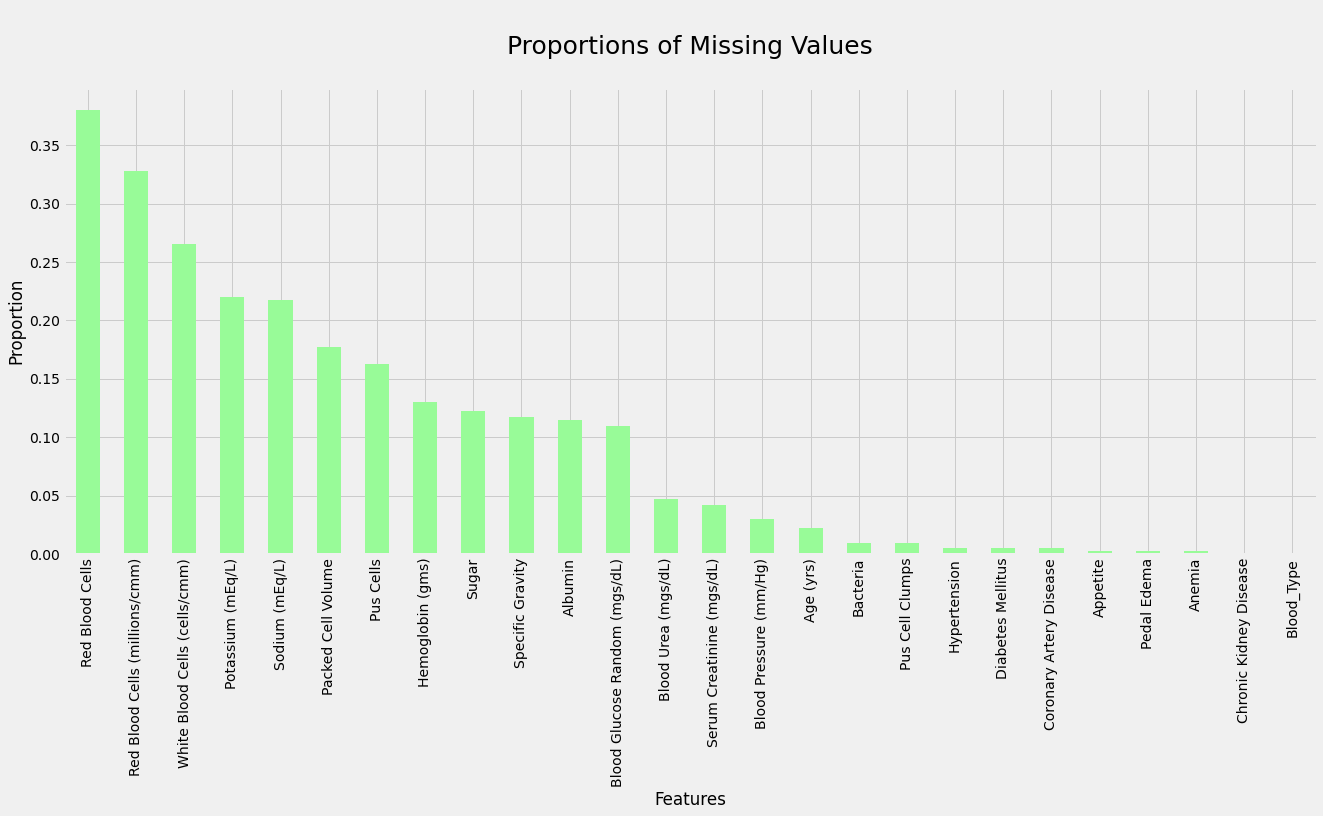

In [15]:
plt.figure(figsize=(20,8))
(missing/400).plot(kind="bar", color="palegreen") #400 is the number of patients/rows/examples/observations/lines in our data
#The "missing" variable contains the numbers of missing values, so we divide by 400 to get the proportions.
plt.title('\nProportions of Missing Values\n', fontsize=25)
plt.ylabel("Proportion")
plt.xlabel("Features")
plt.show()

In [16]:
data.shape

(400, 26)

In [17]:
data.dropna().shape , data.shape

((158, 26), (400, 26))

More than 35% of the values of the "Red Blood Cells" feature are missing.

# Univariate Analysis
Which basically means we will look at each feature by itself, without analyzing the relationships it has with other features.

### Continuous Features

Let's take a look at the "Age (yrs)" feature/variable/column

<AxesSubplot:xlabel='Age (yrs)', ylabel='Count'>

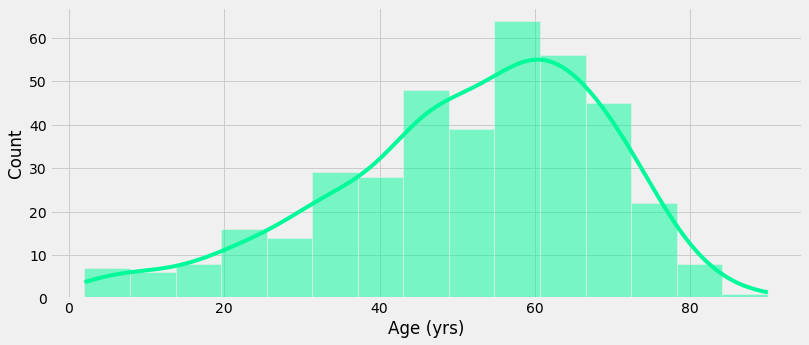

In [18]:
plt.figure(figsize=(12,5))
sns.histplot(data=data, x="Age (yrs)", kde=True, color="mediumspringgreen")
# kde=True means "show me a curve (courbe) with the histogram"

Histograms basically tell you which values (in this case ages) are more common in our data.  
We say it shows you the **"distribution"** of the data.

Boxplots, boxenplots, violinplots, swarmplots, etc are other plots that also show us distributions, but in slightly different ways.  
The following cell plots a histogram and a boxplot in the same graph.

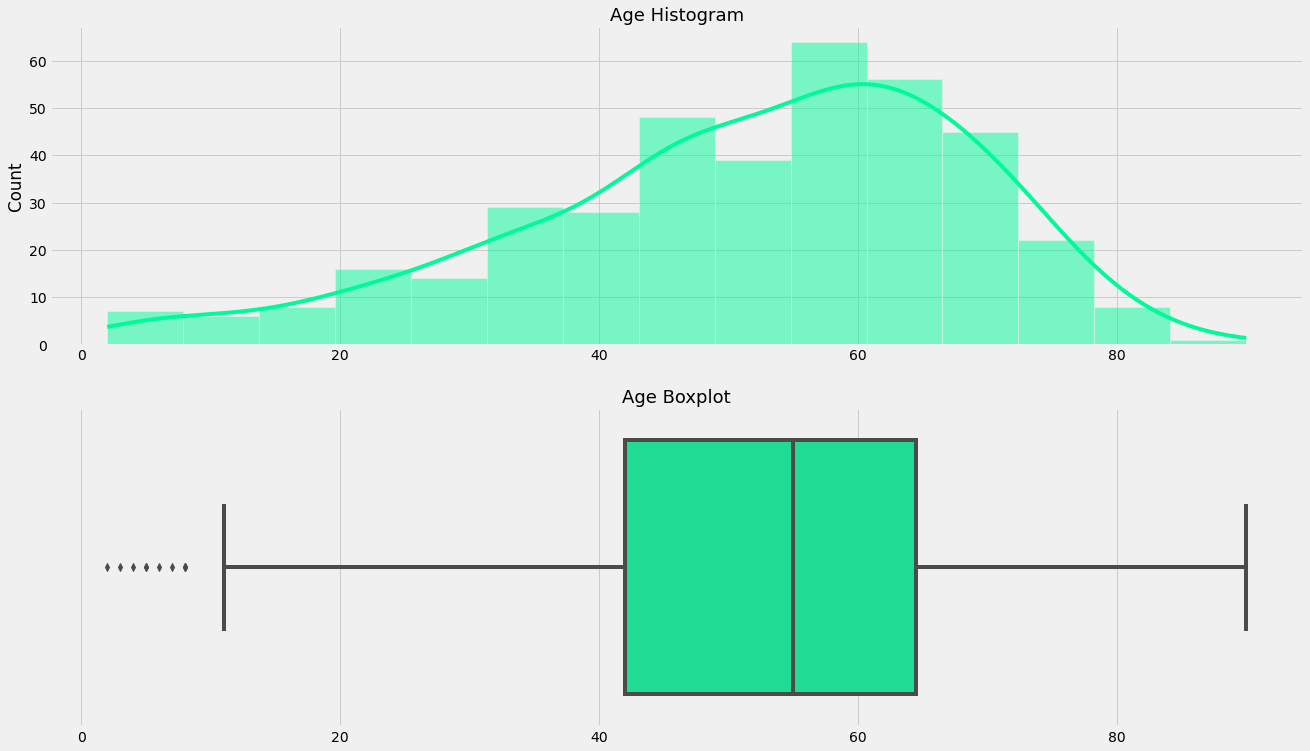

In [19]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(20,12)) #subplots divides your graph into 2 parts
#nrows is the number of lines in our graph
#ncols is the number of columns in our graph
#figsize is the size of the graph
sns.histplot(data=data, x="Age (yrs)", kde=True, color="mediumspringgreen", ax=axes[0])
sns.boxplot(data=data, x="Age (yrs)", color="mediumspringgreen", ax=axes[1])
axes[0].set_title("Age Histogram", fontsize=18)
axes[1].set_title("Age Boxplot", fontsize=18)
axes[0].set_xlabel(None)
axes[1].set_xlabel(None)
plt.show()
#axes[0] means the first part of the graph
#axes[1] means the second part of the graph

The boxplot shows us outliers, which are points that very far away the other points.<br>
25% of the patients in our data have an age lower than it. <br>
and 75% have an age that is lower than it.

The mode is the most frequent (most repeated) value.

In [20]:
data["Age (yrs)"].mode()

0    60.0
dtype: float64

The mean is the average

In [21]:
data["Age (yrs)"].mean()

51.48337595907928

And the median is another kind of average such that:  
50% of the patients in our data have an age higher than the median.  
and 50% have an age that is lower than the median.

In [22]:
data["Age (yrs)"].median()

55.0

The mean is less than the median here because the mean is affected by outliers while the median isn't.

The quantile at 25% is the Age value such that:  
25% of the patients in our data have an age lower than it.  
and 75% have an age that is lower than it.

In [23]:
data["Age (yrs)"].quantile(q=0.25)

42.0

The following cell shows us quantiles and other stufffff....

In [24]:
data["Age (yrs)"].describe()

count    391.000000
mean      51.483376
std       17.169714
min        2.000000
25%       42.000000
50%       55.000000
75%       64.500000
max       90.000000
Name: Age (yrs), dtype: float64

Now we'll fill the missing age values with the average/mean age.

In [25]:
data["Age (yrs)"].fillna(data["Age (yrs)"].mean(), inplace=True)

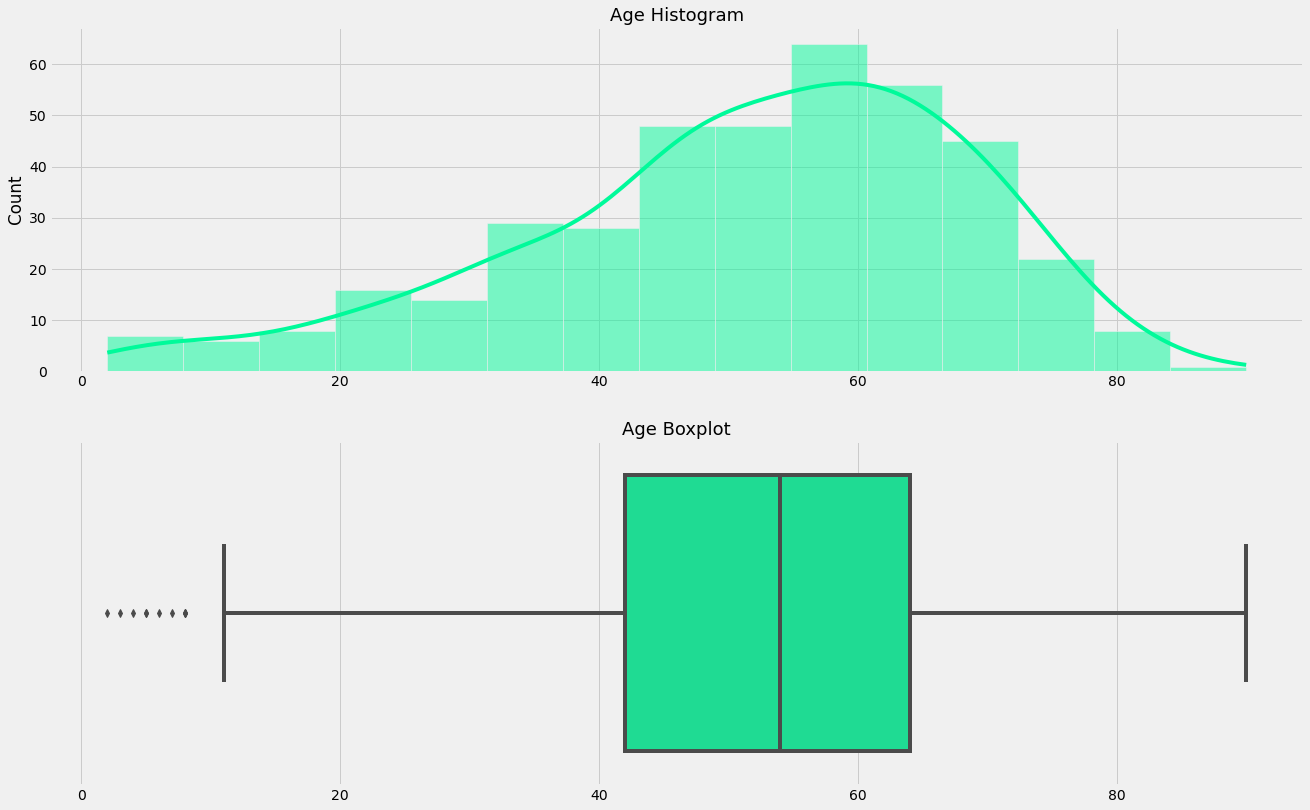

In [26]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(20,13))
sns.histplot(data=data, x="Age (yrs)", kde=True, color="mediumspringgreen", ax=axes[0])
sns.boxplot(data=data, x="Age (yrs)", color="mediumspringgreen", ax=axes[1])
axes[0].set_title("Age Histogram", fontsize=18)
axes[1].set_title("Age Boxplot", fontsize=18)
axes[0].set_xlabel(None)
axes[1].set_xlabel(None)
plt.show()

As you can see, the histogram changed slightly.

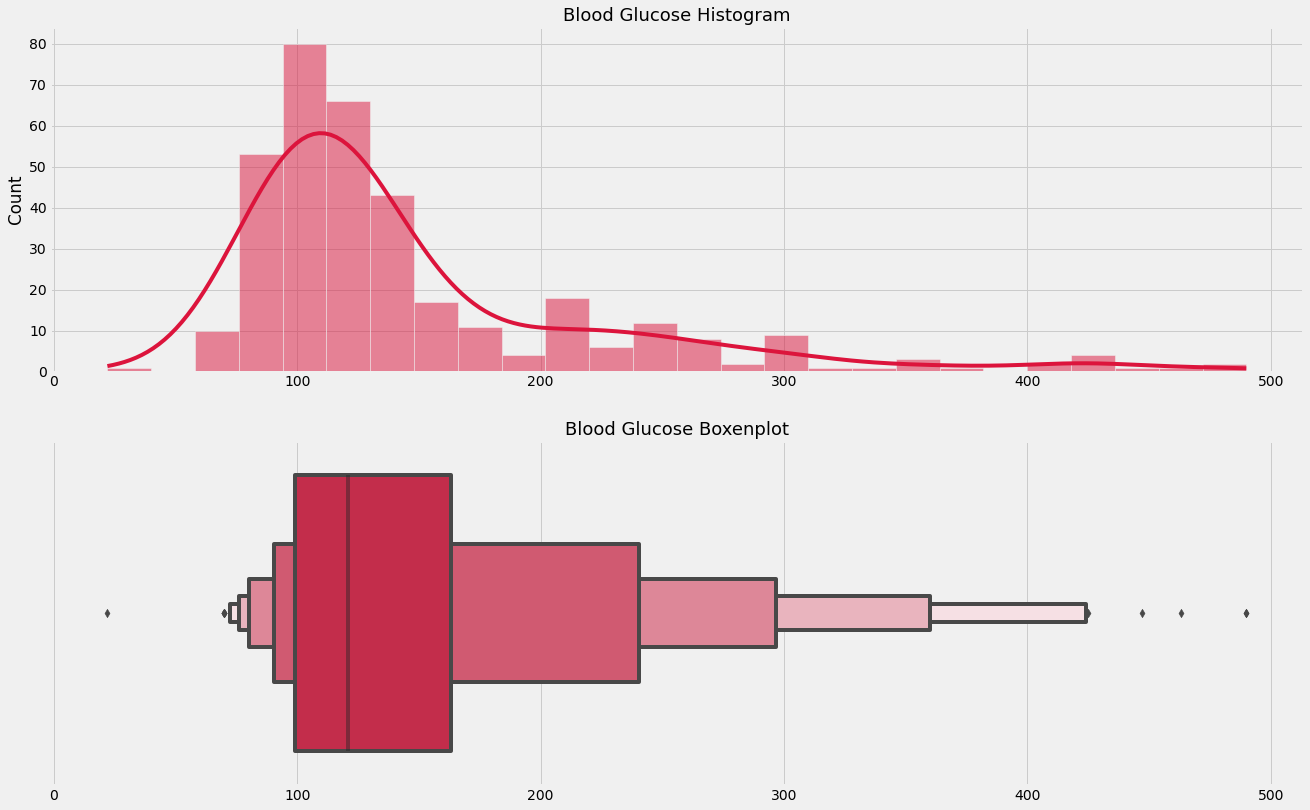

In [27]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(20,13))
sns.histplot(data=data, x="Blood Glucose Random (mgs/dL)", kde=True, color="crimson", ax=axes[0])
sns.boxenplot(data=data, x="Blood Glucose Random (mgs/dL)", color="crimson", ax=axes[1])
axes[0].set_title("Blood Glucose Histogram", fontsize=18)
axes[1].set_title("Blood Glucose Boxenplot", fontsize=18)
axes[0].set_xlabel(None)
axes[1].set_xlabel(None)
plt.show()

The histogram above is kind of pulled towards the right. We say the distribution is **skewed** .   
Boxenplots show less outliers than boxplots.

In [28]:
data["Blood Glucose Random (mgs/dL)"].mean()

148.0365168539326

In [29]:
data["Blood Glucose Random (mgs/dL)"].median()

121.0

The mean and the median are very far apart. This is because the distribution is skewed and has lots of outliers.

In [30]:
data["Blood Glucose Random (mgs/dL)"].mode()

0    99.0
dtype: float64

We'll fill the missing values with the median here because it isn't affected by outliers like the mean is.  
You can use the mode instead if you feel like it.

In [31]:
data["Blood Glucose Random (mgs/dL)"].fillna(data["Blood Glucose Random (mgs/dL)"].mode(), inplace=True)

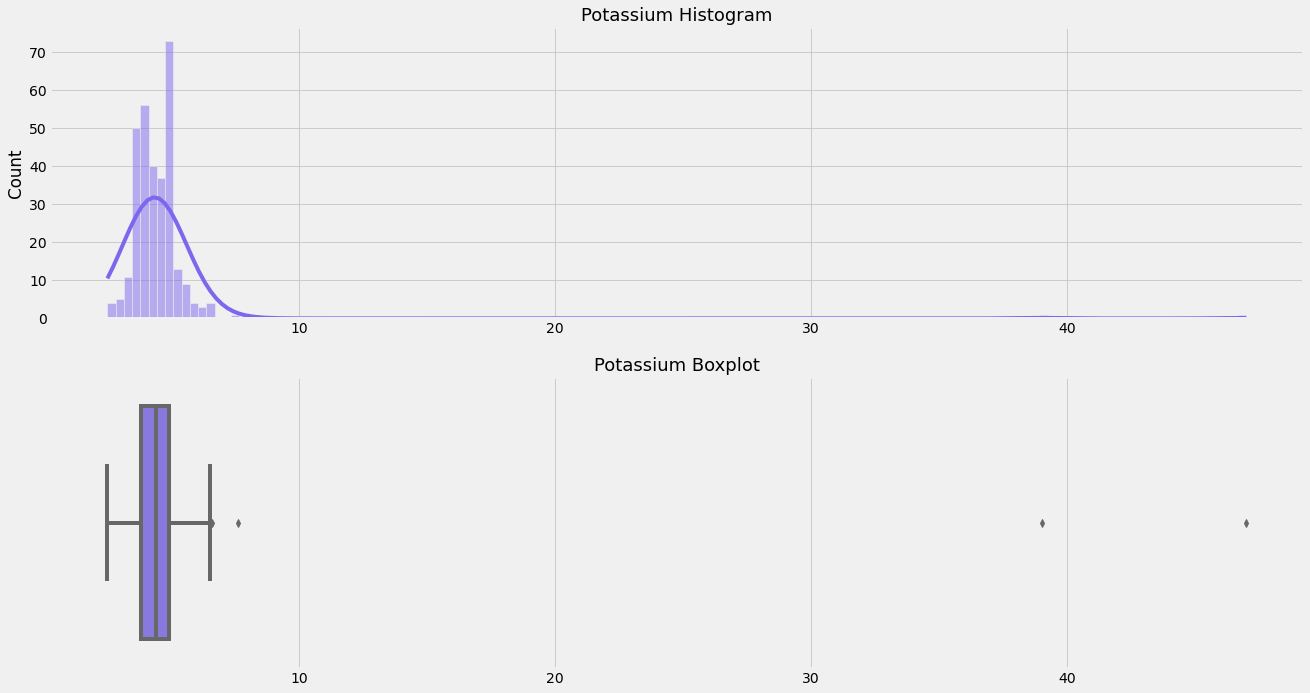

In [32]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(20,11))
sns.histplot(data=data, x="Potassium (mEq/L)", kde=True, color="mediumslateblue", ax=axes[0])
sns.boxplot(data=data, x="Potassium (mEq/L)", color="mediumslateblue", ax=axes[1])
axes[0].set_title("Potassium Histogram", fontsize=18)
axes[1].set_title("Potassium Boxplot", fontsize=18)
axes[0].set_xlabel(None)
axes[1].set_xlabel(None)
plt.show()

This distribution contains some very distant outliers.

In [33]:
data["Potassium (mEq/L)"].mean()

4.62724358974359

In [34]:
data["Potassium (mEq/L)"].median()

4.4

Despite the outliers, the mean and the median are almost the same.  
This is because the number of outliers is very small.  
**The effect of outliers increases with their number and their distance from the center of the distribution.**

In [35]:
data["Potassium (mEq/L)"].mode()

0    3.5
1    5.0
dtype: float64

Note that we have two modes here.  
This is because the values 3.5 and 5.0 are repeated the same number of times.  
The following cell shows us how to get each mode:

In [36]:
print(data["Potassium (mEq/L)"].mode()[0])
print(data["Potassium (mEq/L)"].mode()[1])

3.5
5.0


The following instruction shows us some descriptive statistics about all continuous features.

In [37]:
data.describe()

,Age (yrs),Blood Pressure (mm/Hg),Specific Gravity,Albumin,Sugar,Blood Glucose Random (mgs/dL),Blood Urea (mgs/dL),Serum Creatinine (mgs/dL),Sodium (mEq/L),Potassium (mEq/L),Hemoglobin (gms),Packed Cell Volume,White Blood Cells (cells/cmm),Red Blood Cells (millions/cmm)
count,400.000000,388.000000,353.000000,354.000000,351.000000,356.000000,381.000000,383.000000,313.000000,312.000000,348.000000,329.000000,294.000000,269.000000
mean,51.483376,76.469072,1.017408,1.016949,0.450142,148.036517,57.425722,3.072454,137.528754,4.627244,12.526437,38.884498,8406.122449,4.707435
std,16.974966,13.683637,0.005717,1.352679,1.099191,79.281714,50.503006,5.741126,10.408752,3.193904,2.912587,8.990105,2944.474190,1.025323
min,2.000000,50.000000,1.005000,0.000000,0.000000,22.000000,1.500000,0.400000,4.500000,2.500000,3.100000,9.000000,2200.000000,2.100000
25%,42.000000,70.000000,1.010000,0.000000,0.000000,99.000000,27.000000,0.900000,135.000000,3.800000,10.300000,32.000000,6500.000000,3.900000
50%,54.000000,80.000000,1.020000,0.000000,0.000000,121.000000,42.000000,1.300000,138.000000,4.400000,12.650000,40.000000,8000.000000,4.800000
75%,64.000000,80.000000,1.020000,2.000000,0.000000,163.000000,66.000000,2.800000,142.000000,4.900000,15.000000,45.000000,9800.000000,5.400000
max,90.000000,180.000000,1.025000,5.000000,5.000000,490.000000,391.000000,76.000000,163.000000,47.000000,17.800000,54.000000,26400.000000,8.000000


### Categorical Features

Countplots tell us how often a categorical value is repeated.

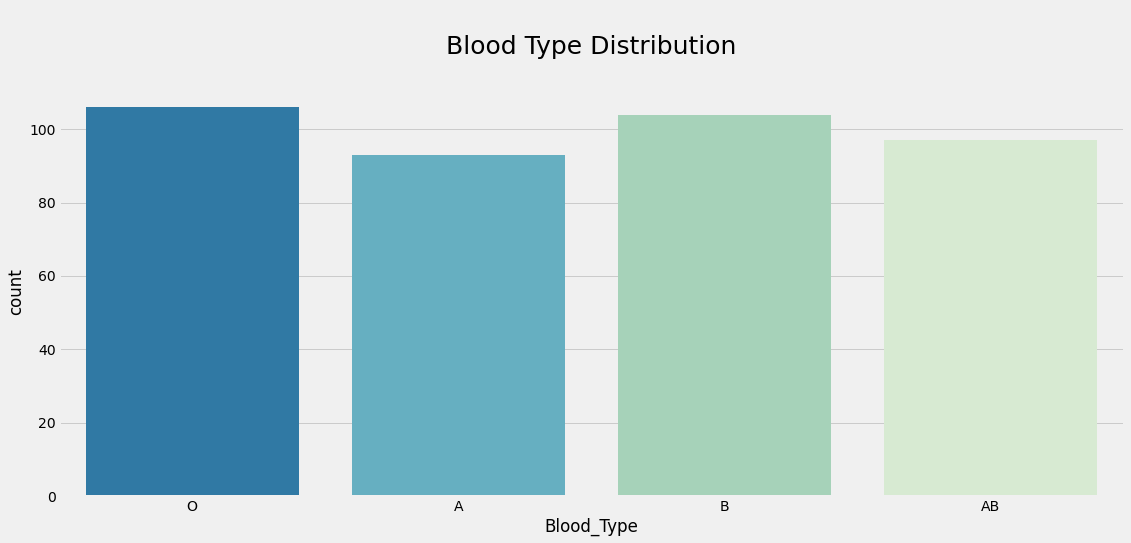

In [38]:
plt.figure(figsize=(17,7))
sns.countplot(data=data, x="Blood_Type", palette='GnBu_r')
plt.title("\nBlood Type Distribution\n", fontsize=25)
plt.show()

We have more than 100 patients with blood type O and about 92 patients with blood type A

We can also use pie charts:

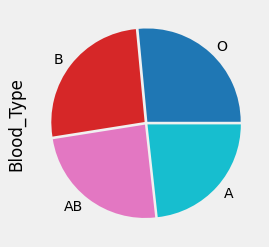

In [39]:
data["Blood_Type"].value_counts().plot(kind='pie', colormap="tab10", explode=[0.02]*4)
#Type "matplotlib colormaps" on google to find the available colormaps
# The explode parameter separates the portions of the circle
# 4 represents the number of categories here
plt.show()

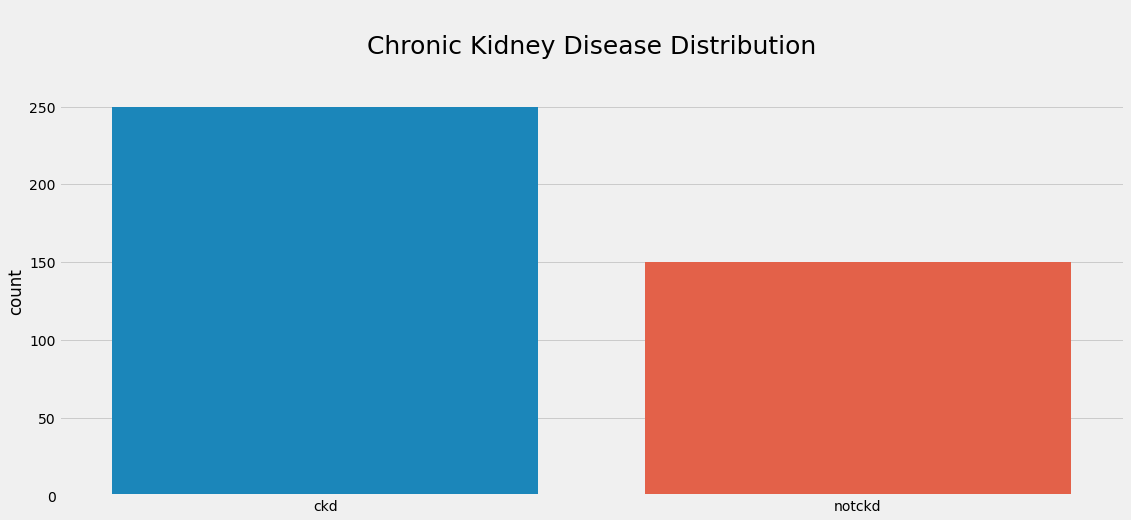

In [40]:
plt.figure(figsize=(17,7))
sns.countplot(data=data, x="Chronic Kidney Disease")
plt.title("\nChronic Kidney Disease Distribution\n", fontsize=25)
plt.xlabel(None) #to remove the title of the x axis
plt.show()

There is considerably more "ckd" patients than "notckd" patients.  
We say this feature is slightly imbalanced.

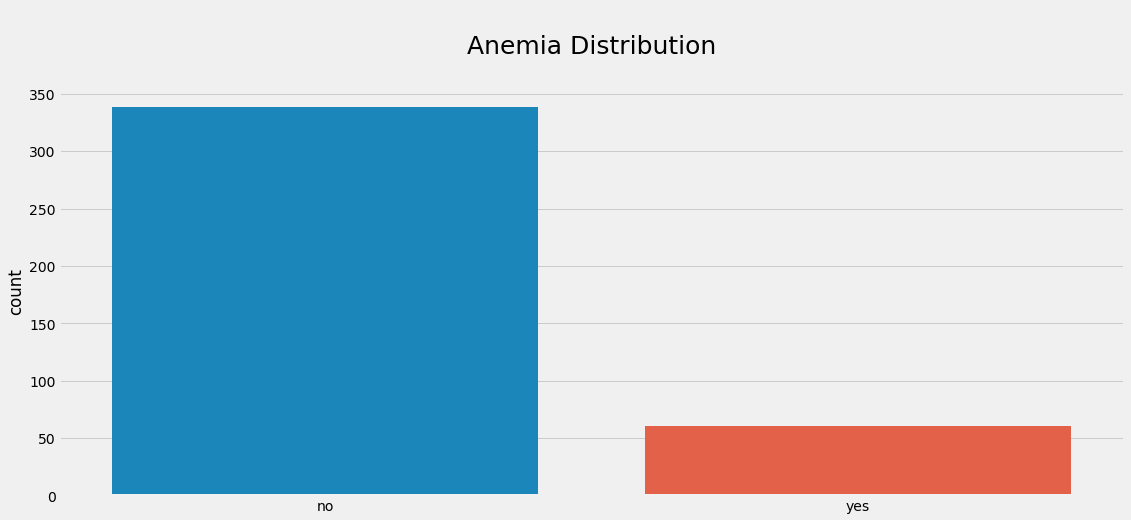

In [41]:
plt.figure(figsize=(17,7))
sns.countplot(data=data, x="Anemia")
plt.title("\nAnemia Distribution\n", fontsize=25)
plt.xlabel(None)
plt.show()

This one is very imbalanced.

In [42]:
data['Anemia'].mode()

0    no
dtype: object

You can see the imbalance in the output of the value_counts() command:

In [43]:
data["Anemia"].value_counts()

no     339
yes     60
Name: Anemia, dtype: int64

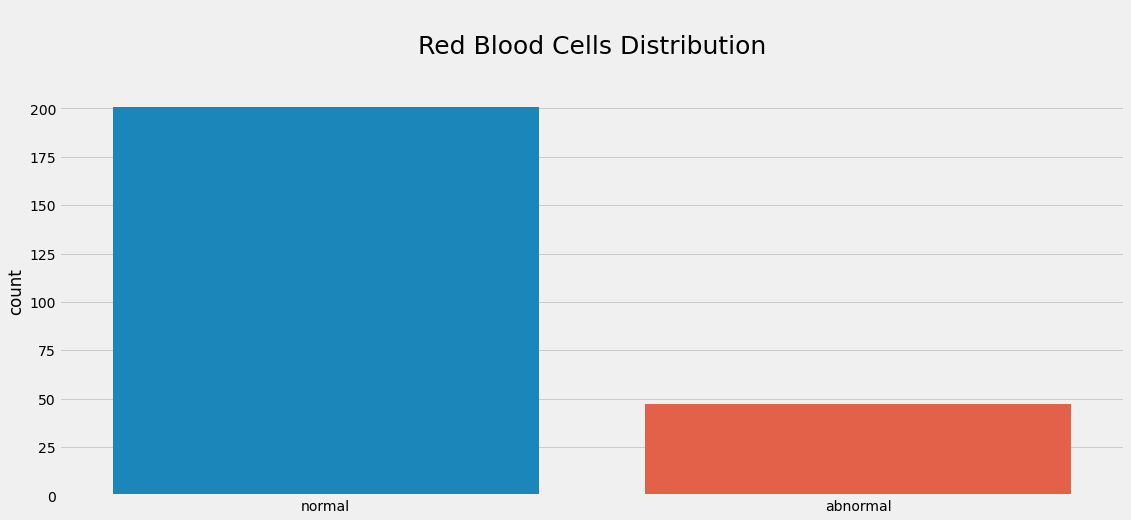

In [44]:
plt.figure(figsize=(17,7))
sns.countplot(data=data, x="Red Blood Cells")
plt.title("\nRed Blood Cells Distribution\n", fontsize=25)
plt.xlabel(None)
plt.show()

This one is also very imbalanced

In [45]:
data["Red Blood Cells"].mode()

0    normal
dtype: object

We will replace its missing values by its mode.

In [46]:
data["Red Blood Cells"].fillna(data["Red Blood Cells"].mode()[0], inplace=True)

Let's see how the distribution looks after filling the missing values.

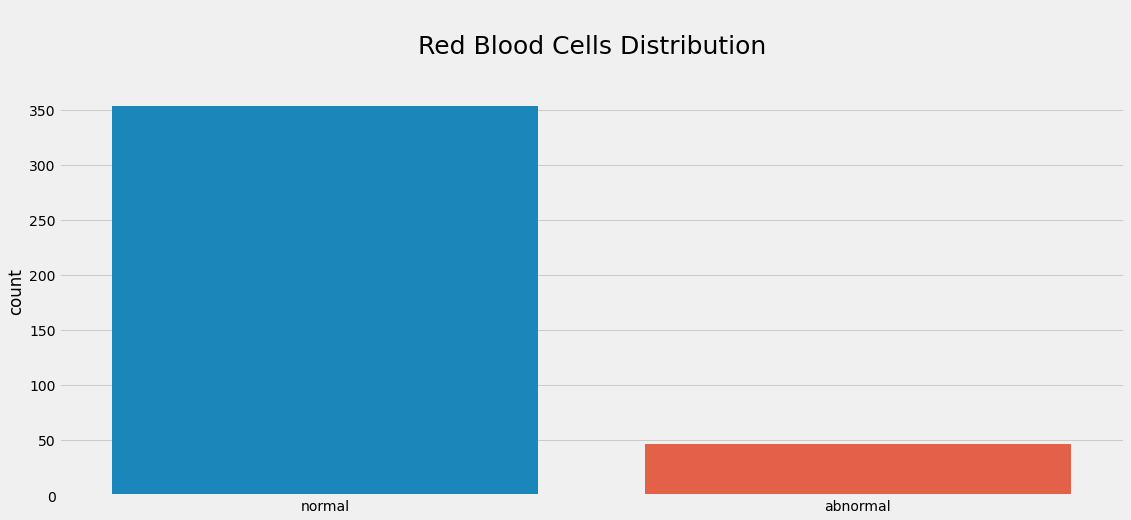

In [47]:
plt.figure(figsize=(17,7))
sns.countplot(data=data, x="Red Blood Cells")
plt.title("\nRed Blood Cells Distribution\n", fontsize=25)
plt.xlabel(None)
plt.show()

Imbalanced data is a problem, especially if the target feature is very imbalanced.

Now let's see how we can fill the missing values of all features with a for loop instead of doing it one by one.

First, we create a list for the numerical features and another for the categorical features.

In [48]:
numerical=[]
for col in data.columns:
    if data[col].dtype=="float64":
        numerical.append(col)
print(numerical)

['Age (yrs)', 'Blood Pressure (mm/Hg)', 'Specific Gravity', 'Albumin', 'Sugar', 'Blood Glucose Random (mgs/dL)', 'Blood Urea (mgs/dL)', 'Serum Creatinine (mgs/dL)', 'Sodium (mEq/L)', 'Potassium (mEq/L)', 'Hemoglobin (gms)', 'Packed Cell Volume', 'White Blood Cells (cells/cmm)', 'Red Blood Cells (millions/cmm)']


In [49]:
categorical=[]
for col in data.columns:
    if data[col].dtype=="object":
        categorical.append(col)
print(categorical)

['Red Blood Cells', 'Pus Cells', 'Pus Cell Clumps', 'Bacteria', 'Hypertension', 'Diabetes Mellitus', 'Coronary Artery Disease', 'Appetite', 'Pedal Edema', 'Anemia', 'Chronic Kidney Disease', 'Blood_Type']


I've chosen to fill NaN values for continuous features with their medians.  
For categorical one I'll just go with the mode.

In [50]:
for col in data.columns:
    if col in numerical:
        data[col].fillna(data[col].median(), inplace=True)
    else:
        data[col].fillna(data[col].mode()[0], inplace=True)

In [51]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Age (yrs)                       400 non-null    float64
 1   Blood Pressure (mm/Hg)          400 non-null    float64
 2   Specific Gravity                400 non-null    float64
 3   Albumin                         400 non-null    float64
 4   Sugar                           400 non-null    float64
 5   Red Blood Cells                 400 non-null    object 
 6   Pus Cells                       400 non-null    object 
 7   Pus Cell Clumps                 400 non-null    object 
 8   Bacteria                        400 non-null    object 
 9   Blood Glucose Random (mgs/dL)   400 non-null    float64
 10  Blood Urea (mgs/dL)             400 non-null    float64
 11  Serum Creatinine (mgs/dL)       400 non-null    float64
 12  Sodium (mEq/L)                  400 

As we can see there are no missing values anymore.

#### Encoding

Now let's see how we turn categorical features into numerical ones.  

Don't mind the next cell, i'm just doing it for 'pedagogical purposes"  
It just creates two copies of the original dataset.

In [52]:
data2 = data.copy(deep=True)
data3 = data.copy(deep=True)

First we'll start with **Label Encoding**

In [53]:
from sklearn.preprocessing import LabelEncoder

In [54]:
encoder = LabelEncoder()

In [55]:
for col in categorical:
    data[col]=encoder.fit_transform(data[col])

In [56]:
data

,Age (yrs),Blood Pressure (mm/Hg),Specific Gravity,Albumin,Sugar,Red Blood Cells,Pus Cells,Pus Cell Clumps,Bacteria,Blood Glucose Random (mgs/dL),...,White Blood Cells (cells/cmm),Red Blood Cells (millions/cmm),Hypertension,Diabetes Mellitus,Coronary Artery Disease,Appetite,Pedal Edema,Anemia,Chronic Kidney Disease,Blood_Type
0,48.0,80.0,1.020,1.0,0.0,1,1,0,0,121.0,...,7800.0,5.2,1,1,0,0,0,0,0,3
1,7.0,50.0,1.020,4.0,0.0,1,1,0,0,121.0,...,6000.0,4.8,0,0,0,0,0,0,0,0
2,62.0,80.0,1.010,2.0,3.0,1,1,0,0,423.0,...,7500.0,4.8,0,1,0,1,0,1,0,2
3,48.0,70.0,1.005,4.0,0.0,1,0,1,0,117.0,...,6700.0,3.9,1,0,0,1,1,1,0,3
4,51.0,80.0,1.010,2.0,0.0,1,1,0,0,106.0,...,7300.0,4.6,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,55.0,80.0,1.020,0.0,0.0,1,1,0,0,140.0,...,6700.0,4.9,0,0,0,0,0,0,1,3
396,42.0,70.0,1.025,0.0,0.0,1,1,0,0,75.0,...,7800.0,6.2,0,0,0,0,0,0,1,1
397,12.0,80.0,1.020,0.0,0.0,1,1,0,0,100.0,...,6600.0,5.4,0,0,0,0,0,0,1,2
398,17.0,60.0,1.025,0.0,0.0,1,1,0,0,114.0,...,7200.0,5.9,0,0,0,0,0,0,1,2


As you can see, blood types became integers (0 1 2 3) instead of characters:

In [57]:
data["Blood_Type"].value_counts()

3    106
2    104
1     97
0     93
Name: Blood_Type, dtype: int64

Another type of encoding is **One Hot Encoding** .

One Hot Encoding simply creates one column for each categorical value

# Bivariate Analysis
Which basically means we'll analyse features two by two and search for relationships/dependencies between them.

In [58]:
style.use("seaborn-darkgrid")

### Continuous X Continuous
This part deals with relationships between two continuous features.

**Scatterplots** are generally a very good way to visualize a relationship between two features:

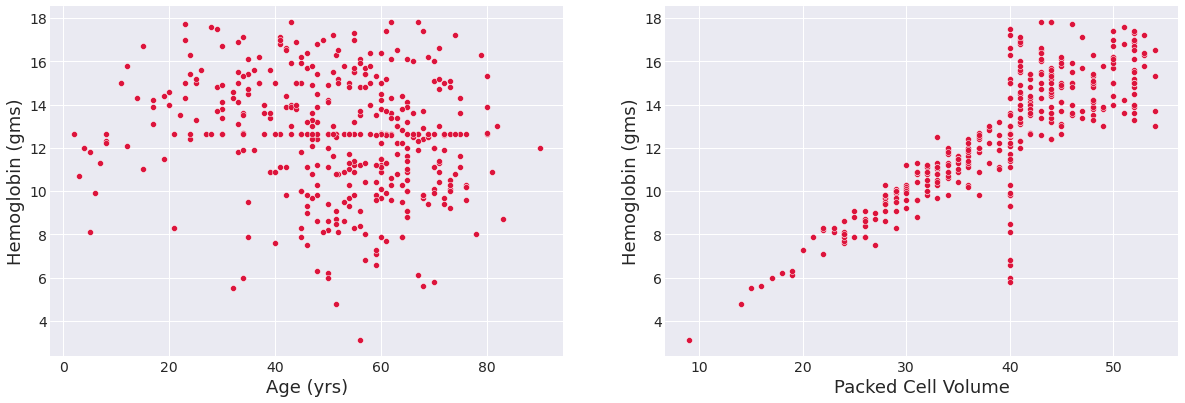

In [59]:
fig, axes = plt.subplots(nrows=1,ncols=2, figsize=(18,6))

sns.scatterplot(data=data, x="Age (yrs)", y="Hemoglobin (gms)", color="crimson", ax=axes[0])

axes[0].set_xlabel(axes[0].get_xlabel(), fontsize=18)
axes[0].set_ylabel(axes[0].get_ylabel(), fontsize=18)

sns.scatterplot(data=data, x="Packed Cell Volume", y="Hemoglobin (gms)", color='crimson', ax=axes[1])

axes[1].set_xlabel(axes[1].get_xlabel(), fontsize=18)
axes[1].set_ylabel(axes[1].get_ylabel(), fontsize=18)

plt.show()

The scatterplot on the left consists of points that are scattered everywhere.  
This basically means that the features are independent.  
The reason we say they are independent is that the value of one of them tells you practically nothing about the value of the other.  

The scatterplot on the right looks a lot like a straight line.  
This means there is a linear relationship ( y = ax + b ) between these two features.  
We can say these features are dependent because the value of one feature tells you (approximately) the value of another.  
Dependence doesn't have to be a linear relationship, it could be in other forms.  

Usually, as long as points are scattered across the plot randomly (LES POINTS TAYSHIN KIMA JE JE) then the features are independent.  
Otherwise they are dependent (to an extent).

#### Note:
You may have noticed that there are many points on the right scatterplot where PackedCellVolume=40.  
You see, we filled the missing values of most continuous features with their medians.  
The median for the "Packed Cell Volume" feature is 40, which is why many data points are located there.  

#### The Correlation Matrix:

The correlation matrix is a way to visualize relationships between features.  
It uses a metric called 'Pearson Correlation', which is a measure of how much two features are **linearly** dependent.  
If there is a linear relationship between the features, the value is close to either 1 or -1.  
**1** means: when one feature **increases**, the other **increases**. Meaning they are proportional.  
**-1** means: when one feature **increases**, the other **decreases** .  
But in both cases, the scatterplot will look like **a line** .  
Unfortunately, correlation doesn't detect dependencies that aren't a straight line.  
But in practice, when two features are dependent it's often a linear dependence.  
So correlation is often sufficient, but still not always.

In [60]:
correlation_matrix = data[numerical].corr()
correlation_matrix

,Age (yrs),Blood Pressure (mm/Hg),Specific Gravity,Albumin,Sugar,Blood Glucose Random (mgs/dL),Blood Urea (mgs/dL),Serum Creatinine (mgs/dL),Sodium (mEq/L),Potassium (mEq/L),Hemoglobin (gms),Packed Cell Volume,White Blood Cells (cells/cmm),Red Blood Cells (millions/cmm)
Age (yrs),1.000000,0.136734,-0.159073,0.084416,0.187615,0.230858,0.192809,0.133438,-0.085760,0.049753,-0.175166,-0.210241,0.094021,-0.202592
Blood Pressure (mm/Hg),0.136734,1.000000,-0.166980,0.123518,0.189561,0.150180,0.180841,0.143184,-0.100705,0.063667,-0.279303,-0.289237,0.022177,-0.219317
Specific Gravity,-0.159073,-0.166980,1.000000,-0.479962,-0.292053,-0.299413,-0.244995,-0.171998,0.210791,-0.052935,0.490699,0.496434,-0.195068,0.432222
Albumin,0.084416,0.123518,-0.479962,1.000000,0.287751,0.293150,0.347418,0.161310,-0.225612,0.107893,-0.474399,-0.473446,0.202920,-0.405092
Sugar,0.187615,0.189561,-0.292053,0.287751,1.000000,0.627002,0.126897,0.096434,-0.051758,0.177396,-0.156807,-0.181285,0.156649,-0.161994
Blood Glucose Random (mgs/dL),0.230858,0.150180,-0.299413,0.293150,0.627002,1.000000,0.118859,0.068886,-0.130569,0.052732,-0.254435,-0.258200,0.119881,-0.214094
Blood Urea (mgs/dL),0.192809,0.180841,-0.244995,0.347418,0.126897,0.118859,1.000000,0.581517,-0.308806,0.339771,-0.541635,-0.523091,0.038362,-0.465243
Serum Creatinine (mgs/dL),0.133438,0.143184,-0.171998,0.161310,0.096434,0.068886,0.581517,1.000000,-0.624036,0.204751,-0.342492,-0.338611,-0.010333,-0.321737
Sodium (mEq/L),-0.085760,-0.100705,0.210791,-0.225612,-0.051758,-0.130569,-0.308806,-0.624036,1.000000,0.069612,0.331483,0.343555,0.008010,0.313929
Potassium (mEq/L),0.049753,0.063667,-0.052935,0.107893,0.177396,0.052732,0.339771,0.204751,0.069612,1.000000,-0.096428,-0.117795,-0.075563,-0.118226


We can use the heatmap function in seaborn to color our values in a way that highlights important values (close to 1 or -1)

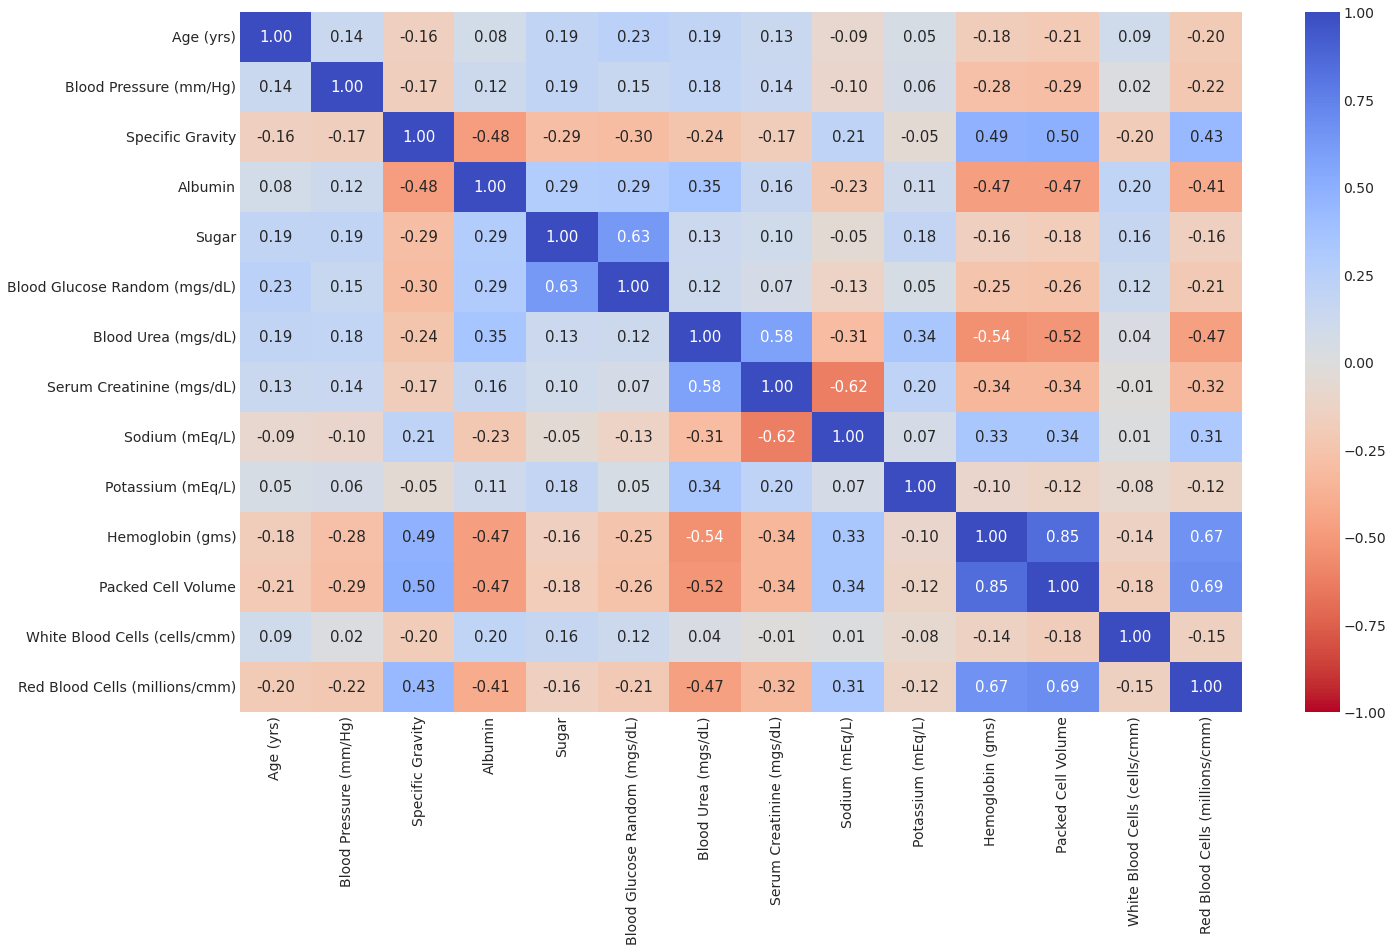

In [61]:
plt.figure(figsize=(20,12))
sns.heatmap(correlation_matrix, cmap="coolwarm_r",annot_kws={'fontsize':15}, fmt=".2f", annot=True, vmin=-1, vmax=1)
plt.show()
#cmap is the colormap you want to use. Basically the colors.
#annot=True means show the values
#annot_kws={'fontsize':15} just sets the fontsize of the annotation
#vmin and vmax are the ends of the colorbar on the right

It is worth mentionning that there other measures of dependency.  
Mutual Information, Gini Index, Kendall & Spearman coefficients, etc.. are a few examples.  

Sklearn's "mutual_info_regression" function can be used to estimate mutual information between two continuous features.

In [62]:
from sklearn.feature_selection import mutual_info_regression

In [63]:
print("Mutual Information between 'Packed Cell Volume' and other continuous features:\n")

mi = mutual_info_regression(data[numerical], data["Packed Cell Volume"])

midf = pd.DataFrame(mi, index=numerical, columns=["Packed Cell Volume"])

midf
# I put it in a dataframe because it would look better than an array.
# We can make a matrix with it if we want, just like the correlation matrix

Mutual Information between 'Packed Cell Volume' and other continuous features:



,Packed Cell Volume
Age (yrs),0.048970
Blood Pressure (mm/Hg),0.124705
Specific Gravity,0.222506
Albumin,0.147115
Sugar,0.034621
Blood Glucose Random (mgs/dL),0.143738
Blood Urea (mgs/dL),0.242499
Serum Creatinine (mgs/dL),0.338833
Sodium (mEq/L),0.239112
Potassium (mEq/L),0.195757


One important thing to note here is that the score has no maximum value. It's not between 0 and 1.  
0 means features aren't dependent, and a "high" value means they are.  
We can still compare dependencies though:  
"Packed Cell Volume" and "Packed Cell Volume" have the highest score since each feature is perfectly related to itself.  
"Hemoglobin (gms)" has a score of 1.08 which is much higher than other scores, so it's much more related to "Packed Cell Volume" than they are.

There is a metric called "normalized mutual information" which makes mutual information between 0 and 1.  
However the sklearn version of it is only compatible with categorical features.

From now on I will be referring to mutual information as MI

## Categorical X Categorical
Relationship between two categorical features.

Cross-Tabulations (crosstabs) are a very common way to visualize relationships/dependencies between categorical features.  
Using a heatmap is usually a good idea to visualize crosstabs.

In [64]:
categorical

['Red Blood Cells',
 'Pus Cells',
 'Pus Cell Clumps',
 'Bacteria',
 'Hypertension',
 'Diabetes Mellitus',
 'Coronary Artery Disease',
 'Appetite',
 'Pedal Edema',
 'Anemia',
 'Chronic Kidney Disease',
 'Blood_Type']

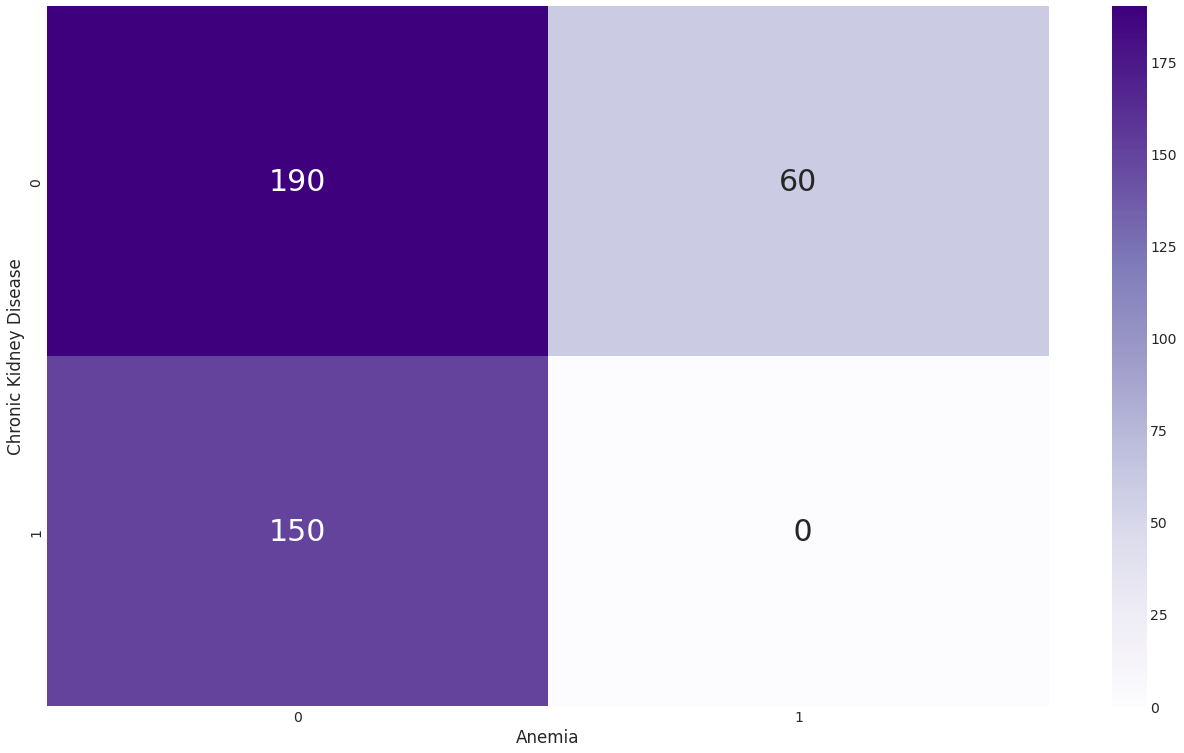

In [65]:
plt.figure(figsize=(20,12))
sns.heatmap(pd.crosstab(data["Chronic Kidney Disease"], data['Anemia']), cmap="Purples", annot=True, annot_kws={"fontsize":30}, fmt='2')
plt.show()

According to the above graph, we might say that if a patient doesn't have Chronic Kidney Disease (class 1), then they don't have Anemia. This means that these two features are dependent.  
However, since we have a (kind of) small number of people without CKD in our dataset, and a very small number of people with anemia then we cannot make judgements with certainty.  
In such scenarios, we could do statistical tests to see if we can be certain about the dependence we observed, but since this tutorial is about Exploratory Data Analysis then we will not delve into that.  

We can still measure dependence between two categorical features using several metrics though.  
Mutual Information is one of them.

In [66]:
from sklearn.feature_selection import mutual_info_classif
from sklearn.metrics.cluster import normalized_mutual_info_score

In [67]:
print("Mutual Information between 'Hypertension' and other categorical features: \n")
mi = mutual_info_classif(data[categorical], data["Hypertension"])
midf = pd.DataFrame(mi, index=categorical, columns=['Hypertension'])
midf

Mutual Information between 'Hypertension' and other categorical features: 



,Hypertension
Red Blood Cells,0.000000
Pus Cells,0.055422
Pus Cell Clumps,0.000000
Bacteria,0.050405
Hypertension,0.658863
Diabetes Mellitus,0.179875
Coronary Artery Disease,0.019101
Appetite,0.116317
Pedal Edema,0.090798
Anemia,0.055112


Same thing here, no fixed upper limit.  
Other than Hypertension itself, we can say that Chronic Kidney Disease is the most related feature to Hypertension.

Normalized MI can give better-looking results as it is between 0 and 1

In [68]:
print("Normalized Mutual Information between 'Hypertension' and other categorical features: \n\n")
for col in categorical:
    mi = normalized_mutual_info_score(data[col], data["Hypertension"])
    print(f"Hypertension X {col}: {mi}\n")

Normalized Mutual Information between 'Hypertension' and other categorical features: 


Hypertension X Red Blood Cells: 0.018654426148020653

Hypertension X Pus Cells: 0.07199612988799424

Hypertension X Pus Cell Clumps: 0.03693612558499428

Hypertension X Bacteria: 0.00874405701038345

Hypertension X Hypertension: 0.9999999999999991

Hypertension X Diabetes Mellitus: 0.29208746684225656

Hypertension X Coronary Artery Disease: 0.11274389253607904

Hypertension X Appetite: 0.09941410578757104

Hypertension X Pedal Edema: 0.1174233053520927

Hypertension X Anemia: 0.10926741397709346

Hypertension X Chronic Kidney Disease: 0.3549572175736107

Hypertension X Blood_Type: 0.003923838313559824



## Continuous X Categorical
Relationships between a categorical and a continuous feature

What we do here is quite simple.  
Since each categorical feature consists of more than one category, we plot histograms or boxplots (or any kind of plot that gives us information about a continuous feature) for each category.  
Here is a couple of examples to illustrate that:

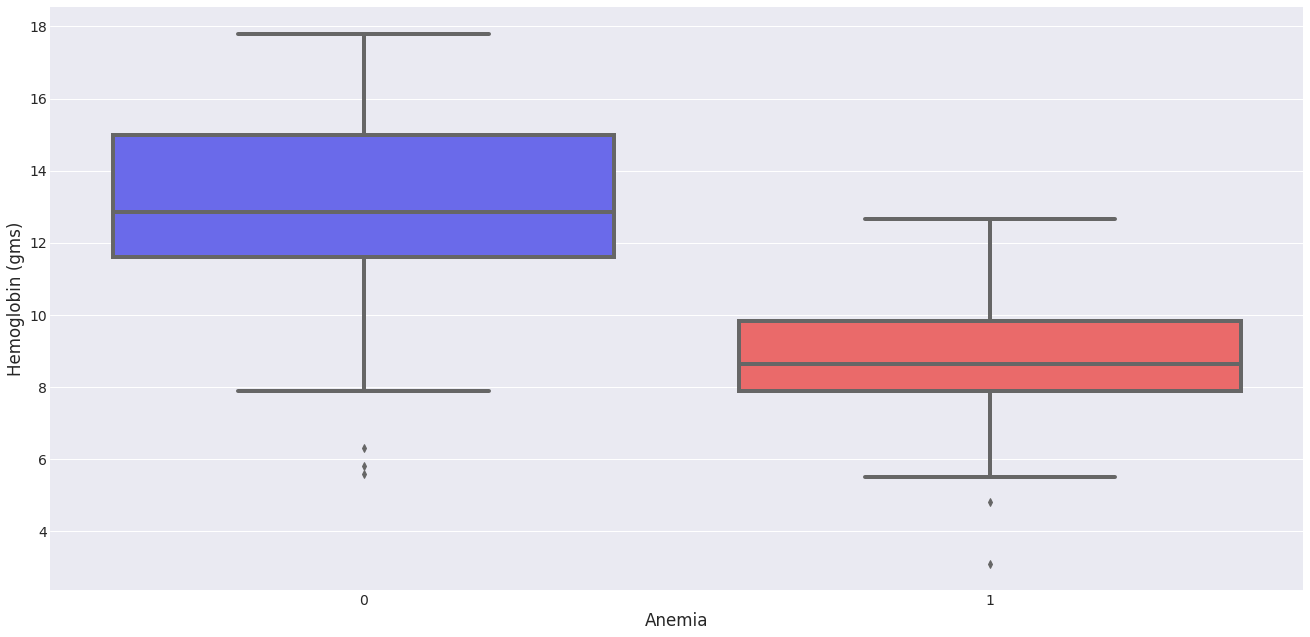

In [69]:
plt.figure(figsize=(20,10))
sns.boxplot(data=data, x="Anemia", y="Hemoglobin (gms)", palette='seismic')
plt.show()

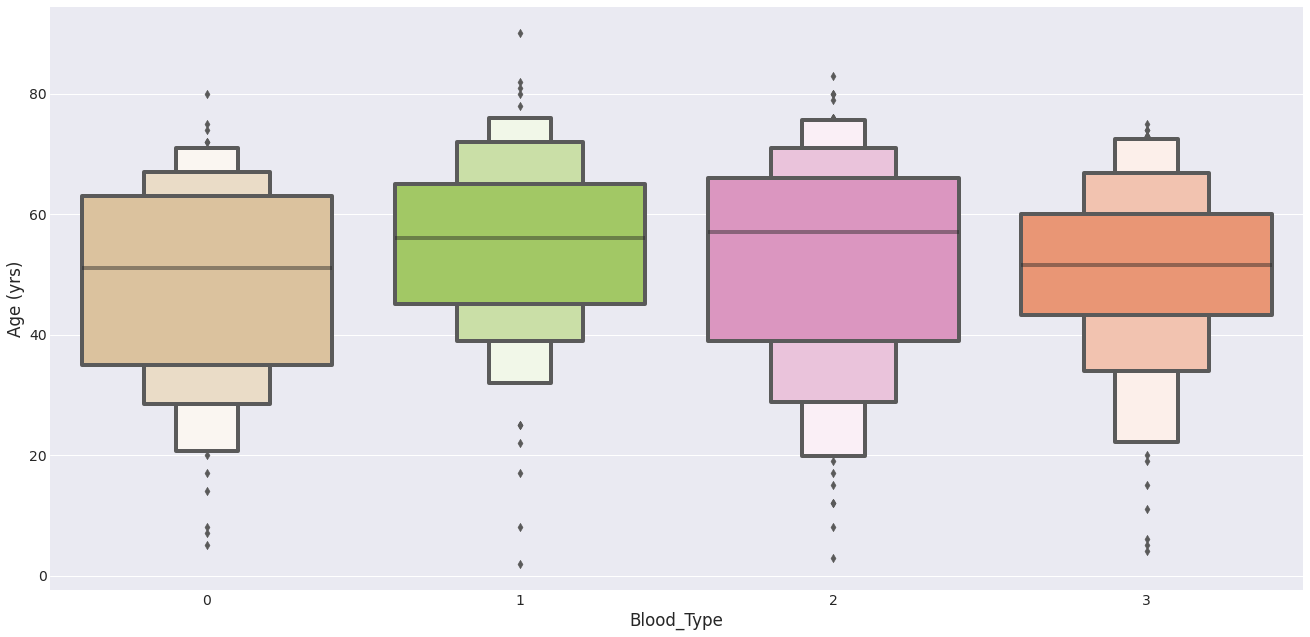

In [70]:
plt.figure(figsize=(20,10))
sns.boxenplot(data=data, x="Blood_Type", y="Age (yrs)", palette='Set2_r')
plt.show()

As with Categorical X Categorical relationships, we can make observations based on these plots then we can test them if we're interested.  
Again, MI is one the ways to measure dependence.

Here is how to measure MI between a continuous and a categorical feature:

In [71]:
print("Mutual Information between 'Chronic Kidney Disease' and continuous features: \n")
mi = mutual_info_classif(data[numerical], data["Chronic Kidney Disease"])
mi_dataframe = pd.DataFrame(mi, columns=["Chronic Kidney Disease"], index=numerical)
mi_dataframe

Mutual Information between 'Chronic Kidney Disease' and continuous features: 



,Chronic Kidney Disease
Age (yrs),0.069087
Blood Pressure (mm/Hg),0.188465
Specific Gravity,0.289772
Albumin,0.232725
Sugar,0.077765
Blood Glucose Random (mgs/dL),0.176756
Blood Urea (mgs/dL),0.152841
Serum Creatinine (mgs/dL),0.373453
Sodium (mEq/L),0.240636
Potassium (mEq/L),0.194102


# Multivariate Analysis
Relationships between multiple features

Two features require 2-dimensional plots to study.  
Although we can't make plots in (for example) 26 dimensions, there are some tricks we can use to visualize high dimensional data.

The "hue" parameter in seaborn's plotting functions allows us to visualize 3 features at the same time.  
Here are some example:

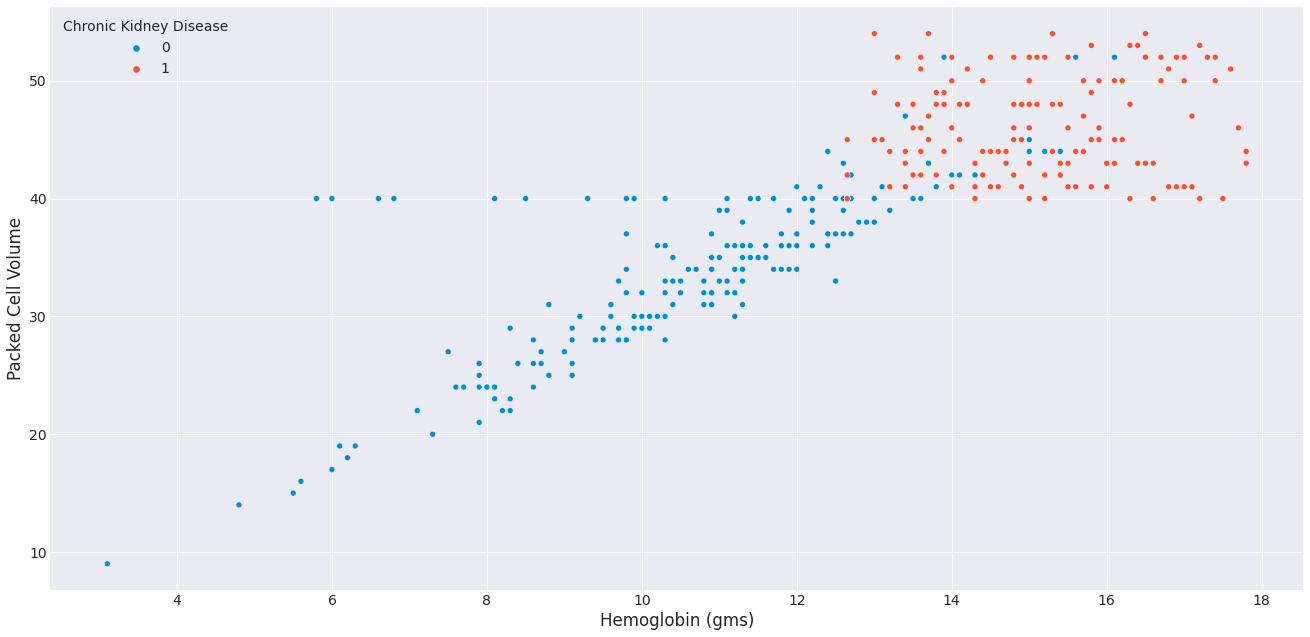

In [72]:
plt.figure(figsize=(20,10))
sns.scatterplot(data=data, x='Hemoglobin (gms)', y="Packed Cell Volume", hue="Chronic Kidney Disease")
plt.show()

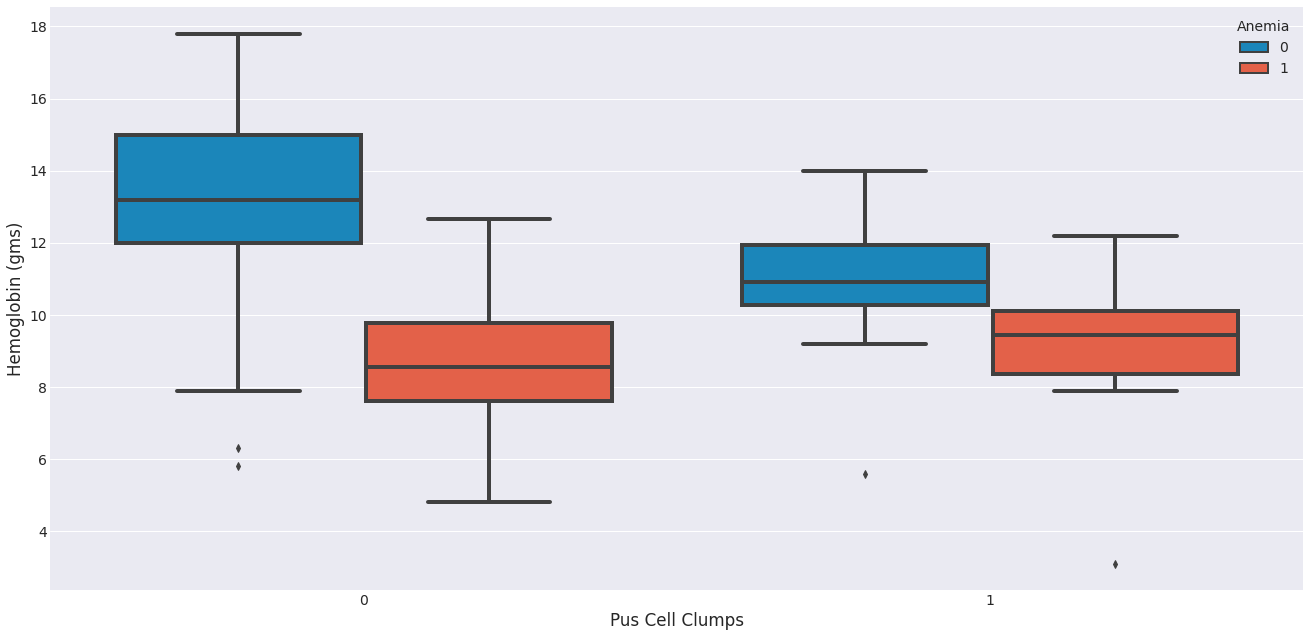

In [73]:
plt.figure(figsize=(20,10))
sns.boxplot(data=data, y='Hemoglobin (gms)', x="Pus Cell Clumps", hue="Anemia")
plt.show()

There are also certain unsupervised learning algorithms that perform "Dimensionality Reduction".  
This means they can be used to visualize high-dimensional data in a 2D plot.  
There are many different algorithms, but we'll try **T-SNE** here.

In [74]:
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler #We'll talk about this later

/opt/conda/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


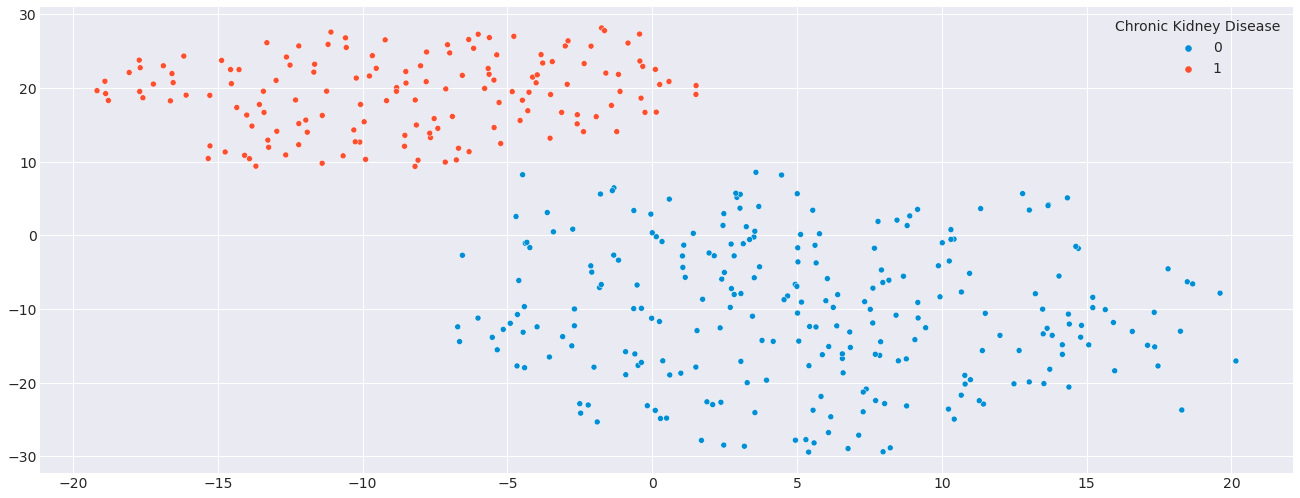

In [75]:
tsne = TSNE()
sc = StandardScaler() #We'll talk about this later
scaled_data = sc.fit_transform(data) #We'll talk about this later
embedding = tsne.fit_transform(scaled_data)

plt.figure(figsize=(20,8))
sns.scatterplot(x=embedding[:,0], y=embedding[:,1], hue=data["Chronic Kidney Disease"])
plt.show()

##### What does this mean? How do we interpret it?  
It just means that people with ckd are well separated in our 25-dimensional space (made of 25 features).  
They are located in different groups.  
It also means that they are 'linearly separable'.  
This might not be interesting/meaningful now, but as you learn about classification and clustering, this would be **very** interesting.  
TSNE is useful because it gives information about which classification models might work and whether there are clusters or not.  
I will not go into furthur detail, because this is not a machine learning tutorial, but just know that this can be very useful later.

##### Note: Dimensionality Reduction techniques have more uses than just visualization.

# Feature Scaling

Scaling means that we put features on the "same scale".  
The scale of a feature is -kind of- how big are its values.  
Here's an example:  
The Age values are -approximately- between 0 and 80, while the values of the "Serum Creatinine (mgs/dL)" feature are mostly between 0 and 15.  
"White Blood Cells (cells/cmm)" has values in thousands.  
We say that "White Blood Cells (cells/cmm)" has the biggest scale, followed by Age, followed by "Serum Creatinine (mgs/dL)".  
Scaling means we make their values similar.  
Scaling is only applied to continuous and ordinal features.
##### But Why?  
Some machine learning models, especially ones that rely on distances between datapoints, require this.  
You'll understand this better when you learn about distance-based models such as KNN and KMeans.  
Scaling has other uses two, but compatibility with distance-based models is probably the most important one.

##### But How?  
There are many ways to do this, and we'll see 3 of them.  

In [76]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler

#### Min-Max Scaling:
We constrain all features between 0 and 1.  
Minimum Age becomes 0, maximum Age (which is 80 for example) becomes 1.  
Minimum "White Blood Cells (cells/cmm)" becomes 0, maximum "White Blood Cells (cells/cmm)" becomes 1.  
And so on.  
We do this by substracting the minimum and dividing by the maximum.

In [77]:
scaler = MinMaxScaler()
arr = scaler.fit_transform(data)
mm_scaled_data = pd.DataFrame(arr, columns=data.columns)
mm_scaled_data

,Age (yrs),Blood Pressure (mm/Hg),Specific Gravity,Albumin,Sugar,Red Blood Cells,Pus Cells,Pus Cell Clumps,Bacteria,Blood Glucose Random (mgs/dL),...,White Blood Cells (cells/cmm),Red Blood Cells (millions/cmm),Hypertension,Diabetes Mellitus,Coronary Artery Disease,Appetite,Pedal Edema,Anemia,Chronic Kidney Disease,Blood_Type
0,0.522727,0.230769,0.75,0.2,0.0,1.0,1.0,0.0,0.0,0.211538,...,0.231405,0.525424,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.000000
1,0.056818,0.000000,0.75,0.8,0.0,1.0,1.0,0.0,0.0,0.211538,...,0.157025,0.457627,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
2,0.681818,0.230769,0.25,0.4,0.6,1.0,1.0,0.0,0.0,0.856838,...,0.219008,0.457627,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.666667
3,0.522727,0.153846,0.00,0.8,0.0,1.0,0.0,1.0,0.0,0.202991,...,0.185950,0.305085,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.000000
4,0.556818,0.230769,0.25,0.4,0.0,1.0,1.0,0.0,0.0,0.179487,...,0.210744,0.423729,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,0.602273,0.230769,0.75,0.0,0.0,1.0,1.0,0.0,0.0,0.252137,...,0.185950,0.474576,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.000000
396,0.454545,0.153846,1.00,0.0,0.0,1.0,1.0,0.0,0.0,0.113248,...,0.231405,0.694915,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.333333
397,0.113636,0.230769,0.75,0.0,0.0,1.0,1.0,0.0,0.0,0.166667,...,0.181818,0.559322,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.666667
398,0.170455,0.076923,1.00,0.0,0.0,1.0,1.0,0.0,0.0,0.196581,...,0.206612,0.644068,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.666667


As you can see, all continuous features have values between 0 and 1 now.

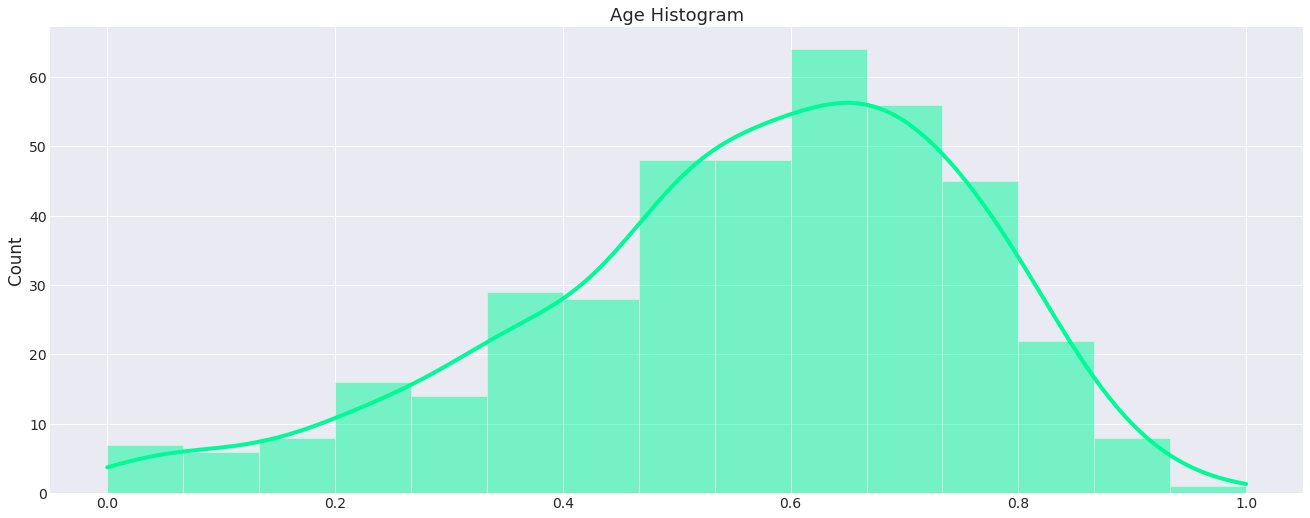

In [78]:
plt.figure(figsize=(20,8))
sns.histplot(data=mm_scaled_data, x="Age (yrs)", kde=True, color="mediumspringgreen")
plt.title("Age Histogram", fontsize=18)
plt.xlabel(None)
plt.show()

MinMax Scaling isn't good with features that have outliers though. Here's why:

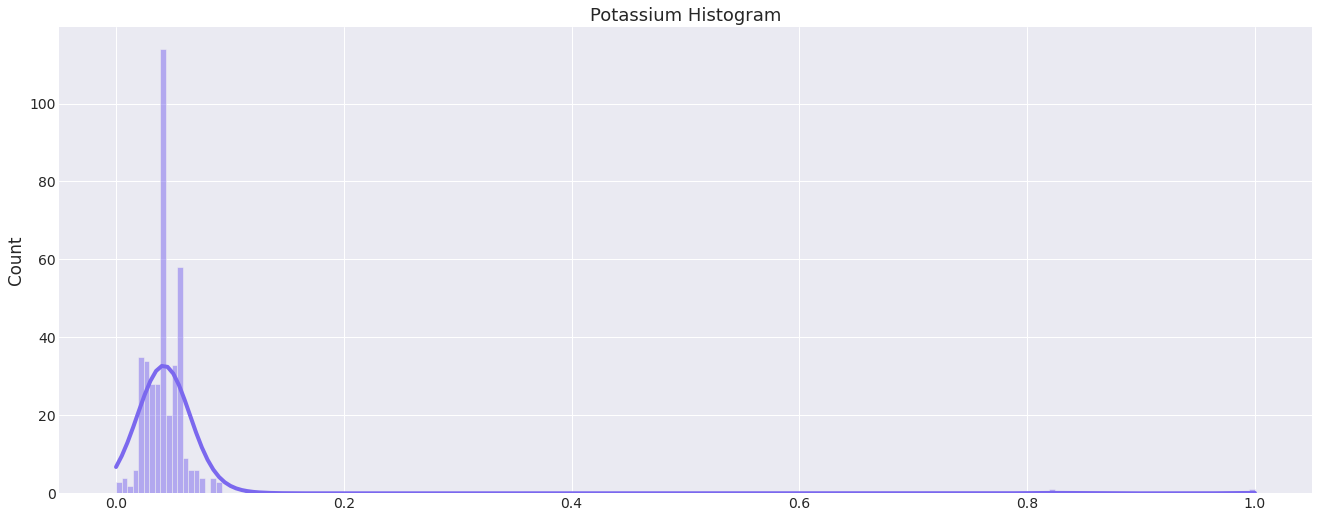

In [79]:
plt.figure(figsize=(20,8))
sns.histplot(data=mm_scaled_data, x="Potassium (mEq/L)", kde=True, color="mediumslateblue")
plt.title("Potassium Histogram", fontsize=18)
plt.xlabel(None)
plt.show()

Because of the outliers, almost all values are between 0 and 0.1, instead of 0 and 1.

So how do we deal with this?  
Well you can get rid of outliers, or you can just use another scaling method.

#### Standardization
This means making each feature have a mean of 0 and a standard deviation of 1.  
**Why??**  
Because that would make its values not deviate too far from zero.  
Each features would have values around 0, 0.2, -1, -0.5, 1.3, -1.8, -0.01, 2.03 etc

In [80]:
scaler = StandardScaler()
arr = scaler.fit_transform(data)
standardized_data = pd.DataFrame(arr, columns=data.columns)
standardized_data

,Age (yrs),Blood Pressure (mm/Hg),Specific Gravity,Albumin,Sugar,Red Blood Cells,Pus Cells,Pus Cell Clumps,Bacteria,Blood Glucose Random (mgs/dL),...,White Blood Cells (cells/cmm),Red Blood Cells (millions/cmm),Hypertension,Diabetes Mellitus,Coronary Artery Disease,Appetite,Pedal Edema,Anemia,Chronic Kidney Disease,Blood_Type
0,-0.205464,0.254214,0.421486,0.076249,-0.380269,0.36489,0.484322,-0.342518,-0.241249,-0.320122,...,-0.197314,0.550044,1.311903,1.385535,-0.304789,-0.507801,-0.484322,-0.420084,-0.774597,1.294519
1,-2.623810,-1.972476,0.421486,2.363728,-0.380269,0.36489,0.484322,-0.342518,-0.241249,-0.320122,...,-0.909782,0.074073,-0.762252,-0.721743,-0.304789,-0.507801,-0.484322,-0.420084,-0.774597,-1.397722
2,0.620313,0.254214,-1.421074,0.838742,2.507853,0.36489,0.484322,-0.342518,-0.241249,3.697618,...,-0.316059,0.074073,-0.762252,1.385535,-0.304789,1.969276,-0.484322,2.380476,-0.774597,0.397106
3,-0.205464,-0.488016,-2.342354,2.363728,-0.380269,0.36489,-2.064742,2.919556,-0.241249,-0.373337,...,-0.632711,-0.996862,1.311903,-0.721743,-0.304789,1.969276,2.064742,2.380476,-0.774597,1.294519
4,-0.028511,0.254214,-1.421074,0.838742,-0.380269,0.36489,0.484322,-0.342518,-0.241249,-0.519679,...,-0.395222,-0.163913,-0.762252,-0.721743,-0.304789,-0.507801,-0.484322,-0.420084,-0.774597,-1.397722
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,0.207425,0.254214,0.421486,-0.686244,-0.380269,0.36489,0.484322,-0.342518,-0.241249,-0.067350,...,-0.632711,0.193066,-0.762252,-0.721743,-0.304789,-0.507801,-0.484322,-0.420084,1.290994,1.294519
396,-0.559368,-0.488016,1.342766,-0.686244,-0.380269,0.36489,0.484322,-0.342518,-0.241249,-0.932096,...,-0.197314,1.739973,-0.762252,-0.721743,-0.304789,-0.507801,-0.484322,-0.420084,1.290994,-0.500308
397,-2.328890,0.254214,0.421486,-0.686244,-0.380269,0.36489,0.484322,-0.342518,-0.241249,-0.599501,...,-0.672293,0.788030,-0.762252,-0.721743,-0.304789,-0.507801,-0.484322,-0.420084,1.290994,0.397106
398,-2.033969,-1.230246,1.342766,-0.686244,-0.380269,0.36489,0.484322,-0.342518,-0.241249,-0.413248,...,-0.434803,1.382994,-0.762252,-0.721743,-0.304789,-0.507801,-0.484322,-0.420084,1.290994,0.397106


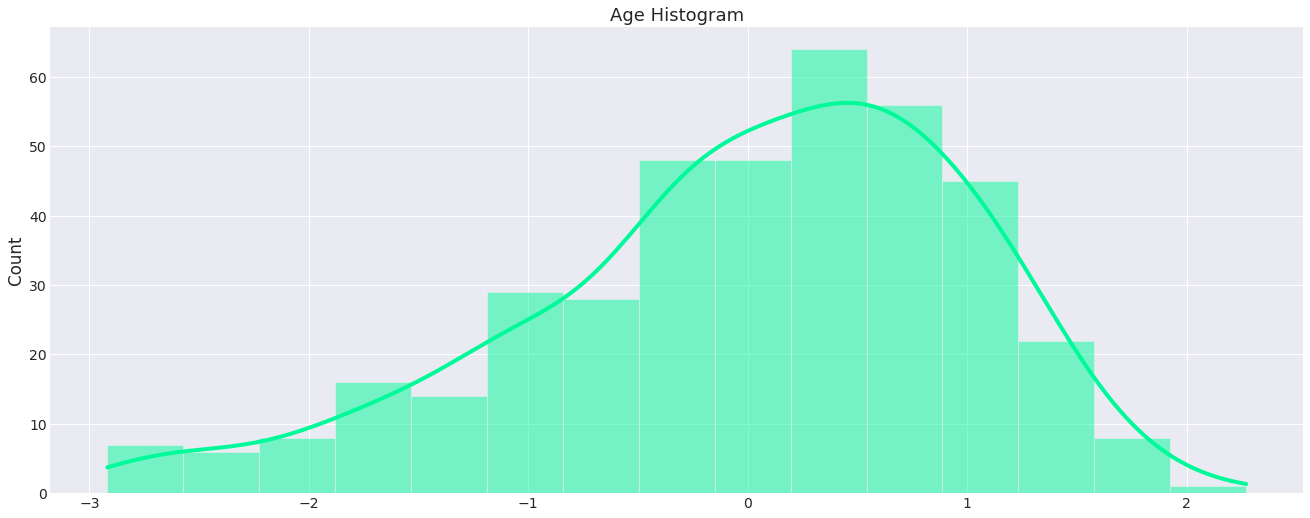

In [81]:
plt.figure(figsize=(20,8))
sns.histplot(data=standardized_data, x="Age (yrs)", kde=True, color="mediumspringgreen")
plt.title("Age Histogram", fontsize=18)
plt.xlabel(None)
plt.show()

As you can see, values are centered around 0 and they don't get that far from it.

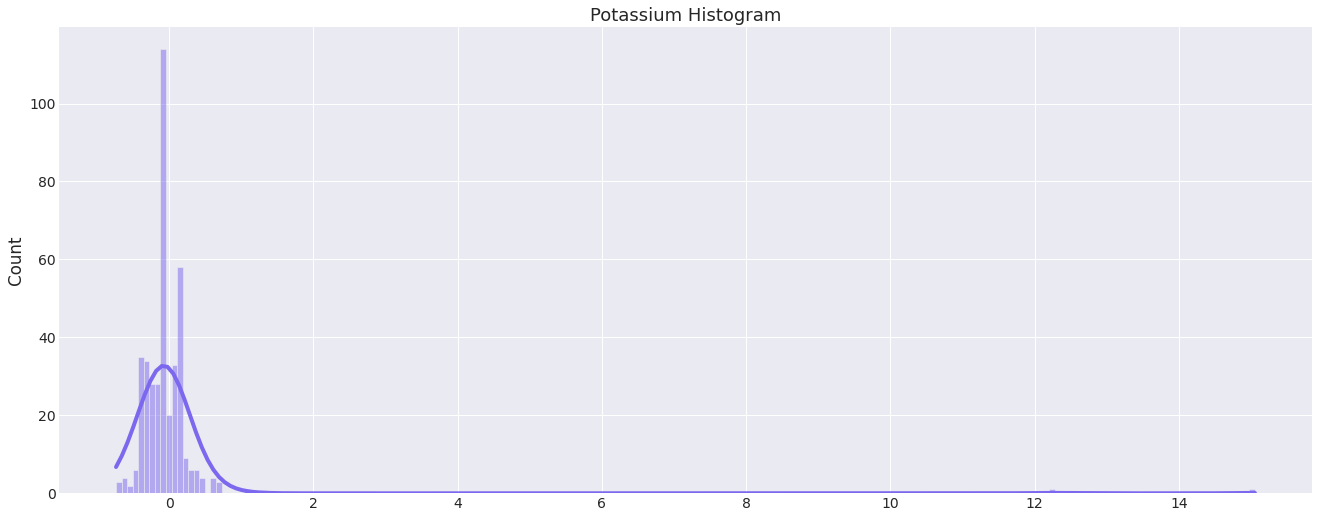

In [82]:
plt.figure(figsize=(20,8))
sns.histplot(data=standardized_data, x="Potassium (mEq/L)", kde=True, color="mediumslateblue")
plt.title("Potassium Histogram", fontsize=18)
plt.xlabel(None)
plt.show()

We can certainly see an improvement here.  
Potassium values are closer to Age values than before.  
But it still isn't perfect.  
Values here are mostly between -1 and 1, while Age values are mostly between -3 and 2.  
Age still has a slightly bigger scale.

**Is there a scaling method that is robust to outliers?**  
Yes there is:

#### Robust Scaling
This is similar to standardization.  
But instead of subtracting the mean, we substract the median.  
And instead of dividing by the standard deviation, we divide by the inter-quartile range.  
Which is the distance between the 25th percentile (also called first quartile) and the 75th percentile (third quartile).  
**And??**  
Contrary to the mean and the standard deviation, the median and the inter-quartile range aren't affected by outliers.  
This scaling method isn't affected by outliers.  
**But what happens to the features??**  
This method ensures that all features will have a median of 0, and that 50% of the data points will be between -0.5 and 0.5.  
Regardless of outliers.

In [83]:
scaler = RobustScaler()
arr = scaler.fit_transform(data)
rs_data = pd.DataFrame(arr, columns=data.columns)
rs_data

,Age (yrs),Blood Pressure (mm/Hg),Specific Gravity,Albumin,Sugar,Red Blood Cells,Pus Cells,Pus Cell Clumps,Bacteria,Blood Glucose Random (mgs/dL),...,White Blood Cells (cells/cmm),Red Blood Cells (millions/cmm),Hypertension,Diabetes Mellitus,Coronary Artery Disease,Appetite,Pedal Edema,Anemia,Chronic Kidney Disease,Blood_Type
0,-0.272727,0.0,0.0,0.5,0.0,0.0,0.0,0.0,0.0,0.000000,...,-0.082474,0.666667,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.5
1,-2.136364,-3.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,-0.824742,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0
2,0.363636,0.0,-2.0,1.0,3.0,0.0,0.0,0.0,0.0,6.163265,...,-0.206186,0.000000,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
3,-0.272727,-1.0,-3.0,2.0,0.0,0.0,-1.0,1.0,0.0,-0.081633,...,-0.536082,-1.500000,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.5
4,-0.136364,0.0,-2.0,1.0,0.0,0.0,0.0,0.0,0.0,-0.306122,...,-0.288660,-0.333333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,0.045455,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.387755,...,-0.536082,0.166667,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.5
396,-0.545455,-1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.938776,...,-0.082474,2.333333,0.0,0.0,0.0,0.0,0.0,0.0,1.0,-0.5
397,-1.909091,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.428571,...,-0.577320,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
398,-1.681818,-2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.142857,...,-0.329897,1.833333,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


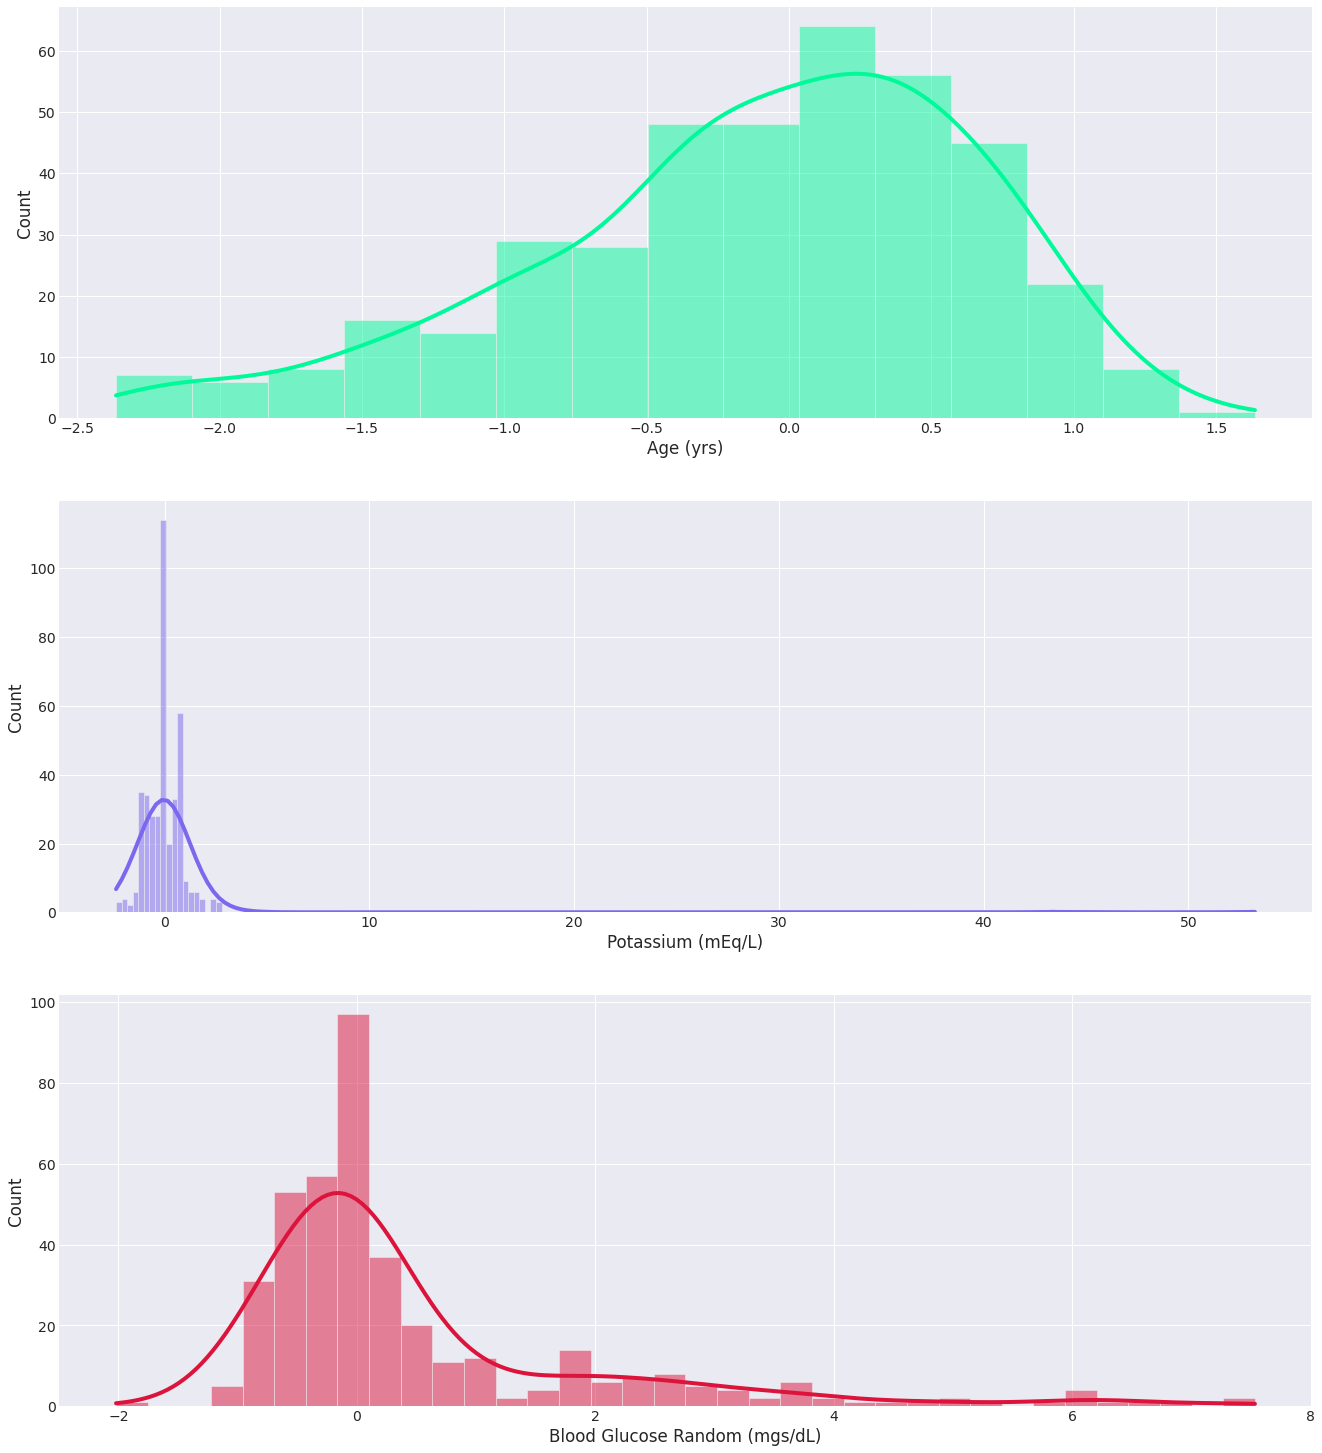

In [84]:
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(20,24))
sns.histplot(data=rs_data, x="Age (yrs)", kde=True, color="mediumspringgreen", ax=axes[0])
sns.histplot(data=rs_data, x="Potassium (mEq/L)", kde=True, color="mediumslateblue", ax=axes[1])
sns.histplot(data=rs_data, x="Blood Glucose Random (mgs/dL)", kde=True, color="crimson", ax=axes[2])
plt.show()

As you can see all features have 50% of their values between -0.5 and 0.5.  
The remaining values don't get much farther from 0 either.  
Outliers do, but there aren't many of them.  
Plus, we want features to be on the same scale for **most** of their values, so a few points situated far from the common scale won't bother.